In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [ ]:
!pip install shap
!pip install eli5
!pip install catboost

     |████████████████████████████████| 564 kB 7.2 MB/s 
     |████████████████████████████████| 216 kB 7.5 MB/s 
     |████████████████████████████████| 133 kB 48.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=85c7bd7975f74d132d1edbae726e55e9665669f9d4bb0f6efd38273f26b0ca6f
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |██████████████████████████

In [ ]:
file_path = '/content/drive/My Drive/ml-project/'
import csv
import pandas as pd
import numpy as np
import ast
import holidays
import datetime
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
import eli5
import shap
from catboost import CatBoostRegressor
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# Start Working

In [ ]:
RATINGS=pd.read_csv(file_path+"ratings.csv")
RATINGS.head()

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [ ]:
ratings=pd.read_csv(file_path+"ratings_small.csv")
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [ ]:
metadata = pd.read_csv(file_path+"movies_metadata.csv", dtype='unicode')
metadata.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  When siblings Judy and Peter discover an encha...  17.015539   
2  A family wedding reignites the ancient feud be...    11.7129   
3  Cheated on, mistreated and stepped on, the wom...   3.859495   
4  Just when George Banks has recovered from his ...   8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

  runtime                                   spoken_languages    status  \
0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2   101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4   106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7       5415  
1                      Jumanji  False          6.9       2413  
2             Grumpier Old Men  False          6.5         92  
3            Waiting to Exhale  False          6.1   

In [ ]:
metadata.shape

(45466, 24)

# Some Revenue Preprocessing

In [ ]:
def removeNa(movies):
  movies.dropna(subset=['budget', 'id', 'imdb_id','popularity',"release_date",
                        "revenue" , "runtime"], inplace = True)
  movies.reset_index(drop = True, inplace = True)
  return movies

In [ ]:
metadata = removeNa(metadata)
datatype_dict = {"budget": np.int64,
                   "id": np.int64, 
                   "popularity": np.float64, 
                   "revenue": np.int64,
                   "runtime": np.float64}
metadata = metadata.astype(datatype_dict, copy=True)

In [ ]:
# fig, ax = plt.subplots(figsize = (16, 6))
# plt.subplot(1, 2, 1)
# plt.hist(metadata['revenue']);
# plt.title('Distribution of revenue');
# plt.subplot(1, 2, 2)
# plt.hist(np.log1p(metadata['revenue'])) ;
mean_revenue=np.mean(metadata['revenue'])
print(mean_revenue)
# plt.title('Distribution of log of revenue');
print(56947589/mean_revenue)

11294235.506006472
5.042181825384664


In [ ]:
print()

In [ ]:
def remove_revenue_outliers(x):
  x = x[x['revenue'] <= 1e9]
  x = x[x['revenue'] > 1e2]
  return x

In [ ]:
metadata = remove_revenue_outliers(metadata)
metadata.shape
mean_revenue=np.mean(metadata['revenue'])
print(mean_revenue)
# plt.title('Distribution of log of revenue');
print(56947589/mean_revenue)

64997040.93024216
0.8761566401325684


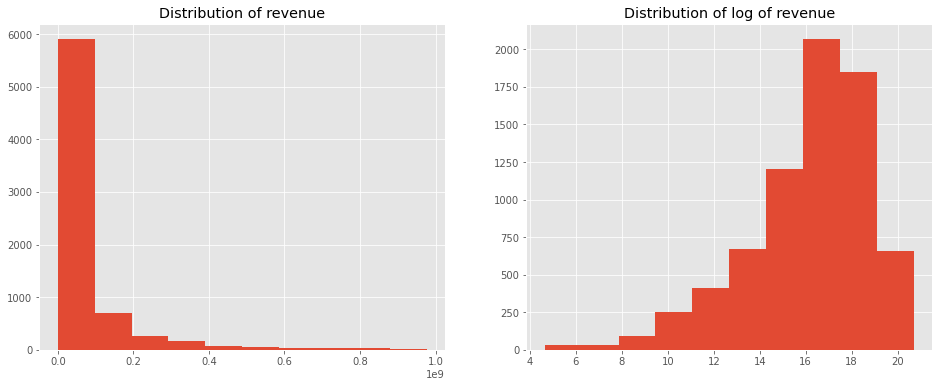

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(metadata['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(metadata['revenue'])) ;
plt.title('Distribution of log of revenue');

In [ ]:
np.mean(np.log1p(metadata['revenue']))

16.139991535890196

In [ ]:
np.median(np.log1p(metadata['revenue']))

16.665252041500704

In [ ]:
metadata['log_revenue'] = np.log1p(metadata['revenue'])

# Belongs to Collection

In [ ]:
for i, e in enumerate(metadata['belongs_to_collection'][:5]):
  print(i,e)

0 {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
1 nan
2 nan
3 {'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}
4 nan


Observations --> Some values are NAN. uhmm so lets see how many are NAN.

In [ ]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [ ]:
metadata['belongs_to_collection'].apply(lambda x: 1 if not is_number(x) else 0).value_counts()

0    5819
1    1449
Name: belongs_to_collection, dtype: int64

40975 values in this column are empty, only 4491 contains information about the collections. We suppose that only collection name can be useful. Another possibly useful feature is the fact of belonging to a collection, So we will manipulate the data accordingly by introducing two new colns collection name and has collection and then drop this coln 

In [ ]:
metadata['collection_name'] = metadata['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)['name'] if not is_number(x) else 0)
metadata['has_collection'] = metadata['belongs_to_collection'].apply(lambda x: 1 if not is_number(x) else 0)

In [ ]:
metadata['has_collection'].head()

0    1
1    0
3    0
4    1
5    0
Name: has_collection, dtype: int64

In [ ]:
metadata['collection_name'].head()

0              Toy Story Collection
1                                 0
3                                 0
4    Father of the Bride Collection
5                                 0
Name: collection_name, dtype: object

In [ ]:
metadata = metadata.drop('belongs_to_collection', axis = 1)

# Genres

In [ ]:
for i, e in enumerate(metadata['genres'][:5]):
    print(i, e)
    print(type(ast.literal_eval(e)))

0 [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
<class 'list'>
1 [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
<class 'list'>
2 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
<class 'list'>
3 [{'id': 35, 'name': 'Comedy'}]
<class 'list'>
4 [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
<class 'list'>


In [ ]:
print('Number of genres in films')
metadata['genres'].apply(lambda x: len(ast.literal_eval(x))).value_counts()

Number of genres in films


2    2335
3    2168
1    1463
4     952
5     278
6      48
0      19
7       4
8       1
Name: genres, dtype: int64

Genres column contains named and ids of genres to which films belong. Most of films have 1-2 genres and 5-6 genres are possible. 6, 8  and 7 are outliers, We think. Let's extract genres! We will create a column with all genres in the film and also separate columns for each genre.

But at first let's have a look at the genres themselves.

In [ ]:
list_of_genres = list(metadata['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if x != {} else []).values)

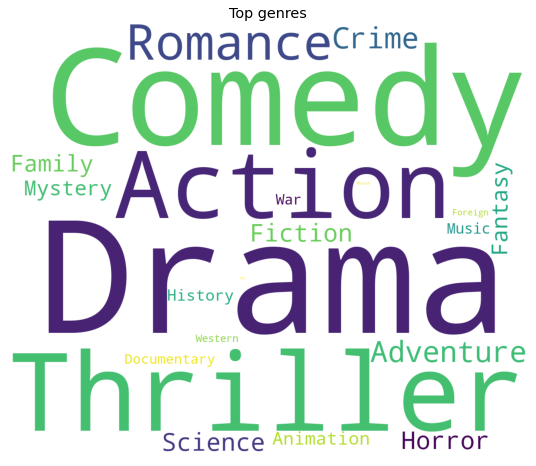

In [ ]:
from wordcloud import WordCloud 
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

Drama, Comedy and Thriller are popular genres.

In [ ]:
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 3623),
 ('Comedy', 2559),
 ('Thriller', 1848),
 ('Action', 1695),
 ('Romance', 1405),
 ('Adventure', 1089),
 ('Crime', 1074),
 ('Science Fiction', 733),
 ('Horror', 731),
 ('Family', 664),
 ('Fantasy', 618),
 ('Mystery', 547),
 ('Animation', 377),
 ('History', 292),
 ('Music', 262),
 ('War', 241),
 ('Documentary', 210),
 ('Western', 115),
 ('Foreign', 75),
 ('TV Movie', 1)]

I'll create separate columns for top-15 genres.

In [ ]:
metadata['num_genres'] = metadata['genres'].apply(lambda x: len(ast.literal_eval(x)) if x != {} else 0)
metadata['all_genres'] = metadata['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in ast.literal_eval(x)])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    metadata['genre_' + g] = metadata['all_genres'].apply(lambda x: 1 if g in x else 0)

In [ ]:
metadata['num_genres'].head()

0    3
1    3
3    3
4    1
5    4
Name: num_genres, dtype: int64

In [ ]:
metadata['all_genres'].head()

0        Animation Comedy Family
1       Adventure Family Fantasy
3           Comedy Drama Romance
4                         Comedy
5    Action Crime Drama Thriller
Name: all_genres, dtype: object

In [ ]:
metadata = metadata.drop('genres', axis = 1)

# Production Companies

In [ ]:
print('Number of production companies in films')
metadata['production_companies'].apply(lambda x: len(ast.literal_eval(x)) if not is_number(x) and type(ast.literal_eval(x)) == list else 0).value_counts()

Number of production companies in films


1     1868
2     1752
3     1361
4      779
5      425
0      383
6      294
7      155
8       90
9       73
11      24
10      21
12       8
16       8
13       6
14       5
19       3
15       3
21       2
17       2
18       2
26       1
24       1
22       1
20       1
Name: production_companies, dtype: int64

Most of films have 1-2 production companies, cometimes 3-4. But there are films with 10+ companies! Let's have a look at some of them.

In [ ]:
metadata[metadata['production_companies'].apply(lambda x: len(ast.literal_eval(x)) if not is_number(x) and type(ast.literal_eval(x)) == list else 0) > 11]

adult    budget                                           homepage  \
28     False  18000000                                                NaN   
3776   False  12800000                                                NaN   
4931   False  14500000                                                NaN   
5847   False  35000000                    http://www.thepianistmovie.com/   
6150   False  35866397                                                NaN   
7207   False  10000000                                                NaN   
9340   False  80000000             http://asoundofthunder.warnerbros.com/   
10301  False         0                        http://www.cache-derfilm.at   
10491  False  14200000                                                NaN   
11226  False   6500000                                                NaN   
11689  False  21000000                                                NaN   
13044  False  25000000                 http://www.blindness-themovie.com/   
13733  False  11000000                                                NaN   
13896  False  30000000                        http://doctorparnassus.com/   
13917  False  23000000                                                NaN   
14692  False  97250400  http://www.asterixauxjeuxolympiques.com/index.php   
14951  False         0                          http://oceans-lefilm.com/   
16945  False   7400000                                                NaN   
18422  False         0             http://www.sonyclassics.com/indarkness   
18705  False  12000000                                                NaN   
19017  False         0                    http://www.blackthornmovie.com/   
19081  False  25000000         http://www.ontheroad-themovie.com/?lang=en   
19475  False  15400000                                                NaN   
20185  False         0                          http://www.dupadealuri.ro   
20323  False         0                        http://www.blancanieves.es/   
21108  False         0                                                NaN   
21291  False  12400000  http://www.indigofilm.it/produzioni/film/61/la...   
21632  False         0                                                NaN   
21684  False   4300000                                                NaN   
23053  False  25500000                                                NaN   
23496  False   4141459                  http://diaphana.fr/film/17-filles   
23911  False   7000000                                                NaN   
24214  False  25000000                                                NaN   
27764  False         0                                                NaN   
29800  False   4000000  http://tickets.picturehouseentertainment.co.uk...   
31643  False   1300000                                                NaN   
33181  False         0                                                NaN   
35858  False         0                                                NaN   
37477  False         0                                                NaN   
39246  False         0                                                NaN   
39557  False   9804690                                                NaN   
41846  False   3500000                                                NaN   
44558  False         0                                                NaN   

           id    imdb_id original_language  \
28        902  tt0112682                fr   
3776       16  tt0168629                en   
4931     9606  tt0293416                ja   
5847      423  tt0253474                en   
6150    11516  tt0301727                fr   
7207      553  tt0276919                da   
9340    10077  tt0318081                en   
10301     445  tt0387898                fr   
10491    1951  tt0342735                da   
11226    1116  tt0460989                en   
11689    9075  tt0389557                nl   
13044    8338  tt0861689                en   
13733   17609  tt087

In [ ]:
list_of_companies = list(metadata['production_companies'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if not is_number(x) and type(ast.literal_eval(x)) == list else []).values)

In [ ]:
Counter([i for j in list_of_companies for i in j]).most_common(30)

[('Warner Bros.', 486),
 ('Universal Pictures', 457),
 ('Paramount Pictures', 386),
 ('Twentieth Century Fox Film Corporation', 338),
 ('Columbia Pictures', 234),
 ('Metro-Goldwyn-Mayer (MGM)', 205),
 ('New Line Cinema', 196),
 ('Touchstone Pictures', 157),
 ('Columbia Pictures Corporation', 139),
 ('Walt Disney Pictures', 138),
 ('Canal+', 131),
 ('TriStar Pictures', 120),
 ('Relativity Media', 115),
 ('Miramax Films', 105),
 ('United Artists', 104),
 ('Village Roadshow Pictures', 89),
 ('Regency Enterprises', 81),
 ('DreamWorks SKG', 78),
 ('Fox Searchlight Pictures', 69),
 ('Lionsgate', 68),
 ('Amblin Entertainment', 66),
 ('StudioCanal', 65),
 ('Working Title Films', 63),
 ('Summit Entertainment', 61),
 ('Dune Entertainment', 61),
 ('Dimension Films', 59),
 ('Orion Pictures', 56),
 ('BBC Films', 55),
 ('Hollywood Pictures', 53),
 ('Fox 2000 Pictures', 52)]

For now We are not sure what to do with this data. We will simply create binary columns for top-30 films. Maybe later We will have a better idea.

In [ ]:
metadata['num_companies'] = metadata['production_companies'].apply(lambda x: len(ast.literal_eval(x)) if not is_number(x) and type(ast.literal_eval(x)) == list else 0)
metadata['all_production_companies'] = metadata['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in ast.literal_eval(x)])) if not is_number(x) and type(ast.literal_eval(x)) == list else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    metadata['production_company_' + g] = metadata['all_production_companies'].apply(lambda x: 1 if g in x else 0)

In [ ]:
metadata['all_production_companies'].head()

0                              Pixar Animation Studios
1    Interscope Communications Teitler Film TriStar...
3               Twentieth Century Fox Film Corporation
4            Sandollar Productions Touchstone Pictures
5        Forward Pass Regency Enterprises Warner Bros.
Name: all_production_companies, dtype: object

In [ ]:
metadata['num_companies'].head()

0    1
1    3
3    1
4    2
5    3
Name: num_companies, dtype: int64

In [ ]:
metadata = metadata.drop(['production_companies', 'all_production_companies'], axis=1)

# Production Countries

In [ ]:
for i, e in enumerate(metadata['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
4 [{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [ ]:
print('Number of production countries in films')
metadata['production_countries'].apply(lambda x: len(ast.literal_eval(x)) if not is_number(x) and type(ast.literal_eval(x)) == list else 0).value_counts()

Number of production countries in films


1     5378
2     1206
3      360
0      135
4      128
5       41
6       12
8        3
9        2
12       1
7        1
10       1
Name: production_countries, dtype: int64

In [ ]:
list_of_countries = list(metadata['production_countries'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if not is_number(x) and type(ast.literal_eval(x)) == list else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 5539),
 ('United Kingdom', 902),
 ('France', 573),
 ('Germany', 407),
 ('Canada', 321),
 ('India', 216),
 ('Italy', 159),
 ('Japan', 156),
 ('Australia', 147),
 ('Spain', 136),
 ('Russia', 129),
 ('China', 95),
 ('Hong Kong', 94),
 ('Belgium', 64),
 ('Ireland', 60),
 ('South Korea', 54),
 ('Sweden', 50),
 ('Mexico', 44),
 ('Netherlands', 42),
 ('Denmark', 40),
 ('New Zealand', 34),
 ('Czech Republic', 30),
 ('Switzerland', 25),
 ('South Africa', 24),
 ('Norway', 23)]

In [ ]:
metadata['num_countries'] = metadata['production_countries'].apply(lambda x: len(ast.literal_eval(x)) if not is_number(x) and type(ast.literal_eval(x)) == list else 0)
metadata['all_countries'] = metadata['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in ast.literal_eval(x)])) if not is_number(x) and type(ast.literal_eval(x)) == list else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    metadata['production_country_' + g] = metadata['all_countries'].apply(lambda x: 1 if g in x else 0)

In [ ]:
metadata = metadata.drop(['production_countries', 'all_countries'], axis=1)

# Spoken languages

In [ ]:
def is_valid_list(x):
  return not is_number(x) and type(ast.literal_eval(x)) == list

In [ ]:
for i, e in enumerate(metadata['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}]
4 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]


In [ ]:
print('Number of spoken languages in films')
metadata['spoken_languages'].apply(lambda x: len(ast.literal_eval(x)) if is_valid_list(x) else 0).value_counts()

Number of spoken languages in films


1    5134
2    1302
3     499
4     177
5      72
0      48
6      23
7       6
8       4
9       3
Name: spoken_languages, dtype: int64

In [ ]:
list_of_languages = list(metadata['spoken_languages'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if is_valid_list(x) else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 6361),
 ('Français', 705),
 ('Español', 549),
 ('Deutsch', 412),
 ('Pусский', 357),
 ('Italiano', 317),
 ('日本語', 203),
 ('普通话', 158),
 ('हिन्दी', 156),
 ('', 111),
 ('العربية', 102),
 ('Português', 99),
 ('广州话 / 廣州話', 88),
 ('한국어/조선말', 74),
 ('Polski', 69)]

In [ ]:
metadata['num_languages'] = metadata['spoken_languages'].apply(lambda x: len(ast.literal_eval(x)) if is_valid_list(x) else 0)
metadata['all_languages'] = metadata['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in ast.literal_eval(x)])) if is_valid_list(x) else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    metadata['language_' + g] = metadata['all_languages'].apply(lambda x: 1 if g in x else 0)

In [ ]:
metadata = metadata.drop(['spoken_languages', 'all_languages'], axis=1)

# Keywords

In [ ]:
keyword_df = pd.read_csv(file_path+'keywords.csv', dtype='unicode')
keyword_df.head() 

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [ ]:
datatype_dict = {"id": np.int64}
keyword_df = keyword_df.astype(datatype_dict, copy=True)
metadata = pd.merge(metadata, keyword_df, on='id')


In [ ]:
metadata.drop_duplicates(subset=['id'],inplace=True)
metadata = metadata.rename(columns = {'keywords':'Keywords'})
metadata.head()

adult    budget                              homepage     id    imdb_id  \
0  False  30000000  http://toystory.disney.com/toy-story    862  tt0114709   
1  False  65000000                                   NaN   8844  tt0113497   
2  False  16000000                                   NaN  31357  tt0114885   
3  False         0                                   NaN  11862  tt0113041   
4  False  60000000                                   NaN    949  tt0113277   

  original_language               original_title  \
0                en                    Toy Story   
1                en                      Jumanji   
2                en            Waiting to Exhale   
3                en  Father of the Bride Part II   
4                en                         Heat   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  Cheated on, mistreated and stepped on, the wom...    3.859495   
3  Just when George Banks has recovered from his ...    8.387519   
4  Obsessive master thief, Neil McCauley leads a ...   17.924927   

                        poster_path release_date    revenue  runtime  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   1995-10-30  373554033     81.0   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   1995-12-15  262797249    104.0   
2  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   1995-12-22   81452156    127.0   
3  /e64sOI48hQXyru7naBFyssKFxVd.jpg   1995-02-10   76578911    106.0   
4  /zMyfPUelumio3tiDKPffaUpsQTD.jpg   1995-12-15  187436818    170.0   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Friends are the people who let you be yourself...   
3  Released  Just When His World Is Back To Normal... He's ...   
4  Released                           A Los Angeles Crime Saga   

                         title  video vote_average vote_count  log_revenue  \
0                    Toy Story  False          7.7       5415    19.738573   
1                      Jumanji  False          6.9       2413    19.386893   
2            Waiting to Exhale  False          6.1         34    18.215526   
3  Father of the Bride Part II  False          5.7        173    18.153832   
4                         Heat  False          7.7       1886    19.048952   

                  collection_name  has_collection  num_genres  \
0            Toy Story Collection               1           3   
1                               0               0           3   
2                               0               0           3   
3  Father of the Bride Collection               1           1   
4                               0               0           4   

                    all_genres  genre_Drama  genre_Comedy  genre_Thriller  \
0      Animation Comedy Family            0             1               0   
1     Adventure Family Fantasy            0             0               0   
2         Comedy Drama Romance            1             1               0   
3                       Comedy            0             1               0   
4  Action Crime Drama Thriller            1             0               1   

   genre_Action  genre_Romance  genre_Adventure  genre_Crime  \
0             0              0                0            0   
1             0              0                1            0   
2             0              1                0            0   
3             0              0                0            0   
4             1              0                0            1   

   genre_Science Fiction  genre_Horror  genre_Family  genre_Fantasy  \
0                      0             0             1              0   
1                      0             0             1              1   
2                      0             0             0         

In [ ]:
for i, e in enumerate(metadata['Keywords'][:5]):
    print(i, e)

0 [{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]
1 [{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': "based on children's book"}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]
2 [{'id': 818, 'name': 'based on novel'}, {'id': 10131, 'name': 'interracial relationship'}, {'id': 14768, 'name': 'single mother'}, {'id': 15160, 'name': 'divorce'}, {'id': 33455, 'name': 'chick flick'}]
3 [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'name': 'midlife crisis'}, {'id': 2246, 'name': 'confidence'}, {'id': 4995, 'name': 'aging'}, {'id': 5600, 'name': 'daughter'}, {'id': 10707, 'name': 'mother daughter relationship'}, {'id': 1

In [ ]:
print('Number of Keywords in films')
metadata['Keywords'].apply(lambda x: len(ast.literal_eval(x)) if is_valid_list(x) else 0).value_counts().head(10)

Number of Keywords in films


5    712
0    635
4    596
3    575
6    572
7    485
2    462
1    438
8    385
9    334
Name: Keywords, dtype: int64

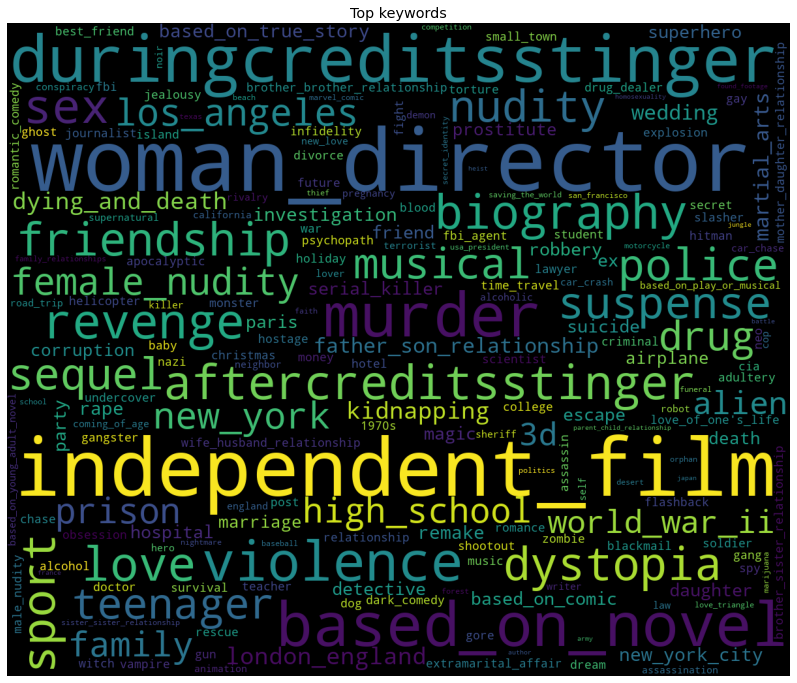

In [ ]:
list_of_keywords = list(metadata['Keywords'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if is_valid_list(x) else []).values)
plt.figure(figsize = (16, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

In [ ]:
metadata['num_Keywords'] = metadata['Keywords'].apply(lambda x: len(ast.literal_eval(x)) if is_valid_list(x) else 0)
metadata['all_Keywords'] = metadata['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in ast.literal_eval(x)])) if is_valid_list(x) else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    metadata['keyword_' + g] = metadata['all_Keywords'].apply(lambda x: 1 if g in x else 0)

In [ ]:
metadata = metadata.drop(['Keywords', 'all_Keywords'], axis=1)

# Cast

In [ ]:
credit_df = pd.read_csv(file_path+'credits.csv', dtype='unicode')
credit_df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [ ]:
datatype_dict = {"id": np.int64}
credit_df = credit_df.astype(datatype_dict, copy=True)
metadata = pd.merge(metadata, credit_df, on='id')
metadata.drop_duplicates(subset=['id'],inplace=True)

In [ ]:
metadata['cast'] = metadata['cast'].apply(lambda x : ast.literal_eval(str(x)))

In [ ]:
for i, e in enumerate(metadata['cast'][:2]):
    print(i, e)

0 [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4

In [ ]:
print('Number of casted persons in films')
metadata['cast'].apply(lambda x: len(x) if type(x) == list else 0).value_counts().head(10)

Number of casted persons in films


15    520
16    376
12    322
11    322
13    319
10    318
17    307
8     276
14    274
9     271
Name: cast, dtype: int64

In [ ]:
list_of_cast_names = list(metadata['cast'].apply(lambda x: [i['name'] for i in x] if type(x) == list else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 77),
 ('Robert De Niro', 71),
 ('Bruce Willis', 62),
 ('Morgan Freeman', 60),
 ('Steve Buscemi', 56),
 ('Liam Neeson', 56),
 ('Willem Dafoe', 54),
 ('Sylvester Stallone', 53),
 ('Nicolas Cage', 53),
 ('Matt Damon', 52),
 ('John Goodman', 51),
 ('Robin Williams', 50),
 ('Julianne Moore', 49),
 ('J.K. Simmons', 49),
 ('Christopher Walken', 48)]

In [ ]:
list_of_cast_genders = list(metadata['cast'].apply(lambda x: [i['gender'] for i in x] if type(x) == list else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 68557), (0, 52374), (1, 33958)]

0 is unspecified, 1 is female, and 2 is male.  (https://www.kaggle.com/c/tmdb-box-office-prediction/discussion/80983#475572)

In [ ]:
list_of_cast_characters = list(metadata['cast'].apply(lambda x: [i['character'] for i in x] if type(x) == list else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 1780),
 ('Himself', 1464),
 ('Herself', 386),
 ('Dancer', 373),
 ('Additional Voices (voice)', 325),
 ('Extra (uncredited)', 230),
 ('Reporter', 222),
 ('Doctor', 202),
 ('Nurse', 170),
 ('Waitress', 146),
 ('Bartender', 143),
 ('Soldier', 118),
 ('Paul', 109),
 ('Security Guard', 109),
 ('Priest', 109)]

We think it is quite funny the most popular male role is playing himself. :)

In [ ]:
metadata['num_cast'] = metadata['cast'].apply(lambda x: len(x) if type(x) == list else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_cast_names:
    metadata['cast_name_' + g] = metadata['cast'].apply(lambda x: 1 if g in str(x) else 0)
metadata['genders_0_cast'] = metadata['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
metadata['genders_1_cast'] = metadata['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
metadata['genders_2_cast'] = metadata['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    metadata['cast_character_' + g] = metadata['cast'].apply(lambda x: 1 if g in str(x) else 0)

In [ ]:
metadata['num_cast'].head()
metadata = metadata.drop(['cast'], axis=1)

# Crew

In [ ]:
metadata['crew'] = metadata['crew'].apply(lambda x : ast.literal_eval(str(x)))


In [ ]:
for i, e in enumerate(metadata['crew'][:10]):
    print(i, e)


0 [{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depa

In [ ]:
metadata['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)


2     377
3     326
10    313
11    278
12    271
8     269
9     262
14    256
4     245
13    240
Name: crew, dtype: int64

In [ ]:

list_of_crew_names = list(metadata['crew'].apply(lambda x: [i['name'] for i in x] if type(x) == list else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)


[('Avy Kaufman', 105),
 ('Steven Spielberg', 103),
 ('Robert Rodriguez', 100),
 ('Mary Vernieu', 100),
 ('Deborah Aquila', 89),
 ('Bob Weinstein', 86),
 ('Harvey Weinstein', 85),
 ('Tricia Wood', 84),
 ('Hans Zimmer', 81),
 ('James Newton Howard', 81),
 ('Luc Besson', 79),
 ('James Horner', 77),
 ('Francine Maisler', 76),
 ('Kerry Barden', 73),
 ('Jerry Goldsmith', 72)]

In [ ]:

list_of_crew_jobs = list(metadata['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)


[('Producer', 14578),
 ('Executive Producer', 8500),
 ('Director', 7927),
 ('Screenplay', 7330),
 ('Editor', 6987),
 ('Casting', 6027),
 ('Director of Photography', 5578),
 ('Original Music Composer', 4719),
 ('Art Direction', 4597),
 ('Production Design', 4005),
 ('Costume Design', 3848),
 ('Writer', 3791),
 ('Set Decoration', 3249),
 ('Makeup Artist', 2750),
 ('Sound Re-Recording Mixer', 2265)]

In [ ]:

list_of_crew_genders = list(metadata['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)


[(0, 104657), (2, 60746), (1, 15415)]

In [ ]:


list_of_crew_departments = list(metadata['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)


[('Production', 38951),
 ('Sound', 22640),
 ('Art', 19952),
 ('Crew', 18195),
 ('Writing', 16168),
 ('Costume & Make-Up', 15303),
 ('Camera', 13326),
 ('Directing', 12172),
 ('Editing', 11135),
 ('Visual Effects', 9758),
 ('Lighting', 3213),
 ('Actors', 5)]

In [ ]:
metadata['num_crew'] = metadata['crew'].apply(lambda x: len(x) if type(x) == list else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for g in top_crew_names:
    metadata['crew_name_' + g] = metadata['crew'].apply(lambda x: 1 if g in str(x) else 0)
metadata['genders_0_crew'] = metadata['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
metadata['genders_1_crew'] = metadata['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
metadata['genders_2_crew'] = metadata['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    metadata['jobs_' + j] = metadata['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    metadata['departments_' + j] = metadata['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

In [ ]:
metadata = metadata.drop(['crew'], axis=1)

In [ ]:
metadata.shape

(7259, 238)

## Budget

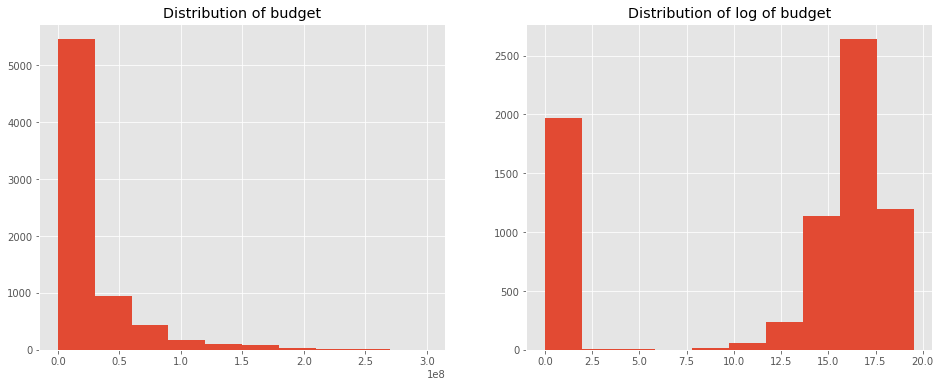

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(metadata['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(metadata['budget']));
plt.title('Distribution of log of budget');

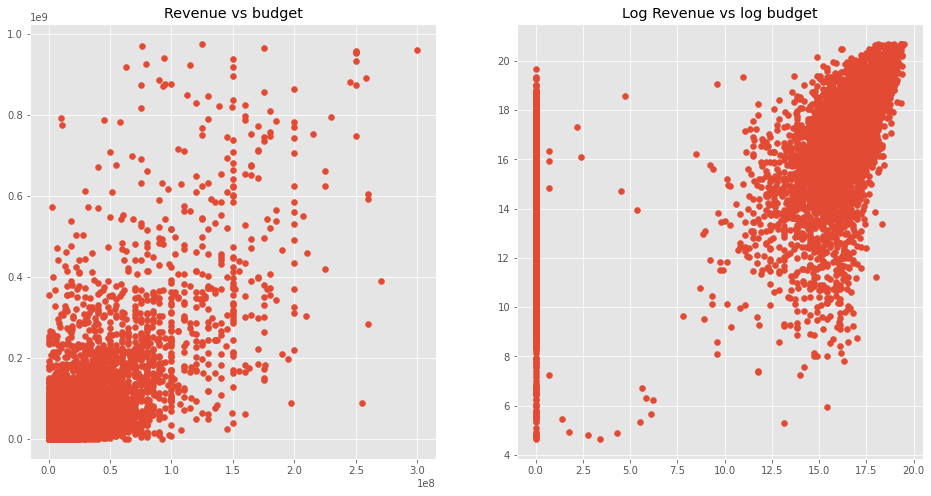

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(metadata['budget'], metadata['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(metadata['budget']), metadata['log_revenue'])
plt.title('Log Revenue vs log budget');

In [ ]:
metadata.shape

(7259, 238)

In [ ]:
metadata['log_budget'] = np.log1p(metadata['budget'])

# Home page

In [ ]:
metadata['homepage'].value_counts().head()

http://www.missionimpossible.com/    4
http://www.thehungergames.movie/     4
http://www.transformersmovie.com/    3
http://www.kungfupanda.com/          3
http://www.workandtheglory.com/      3
Name: homepage, dtype: int64

Most of homepages are unique, so this feature may be useless.

In [ ]:
metadata['has_homepage'] = 0
metadata.loc[metadata['homepage'].isnull() == False, 'has_homepage'] = 1

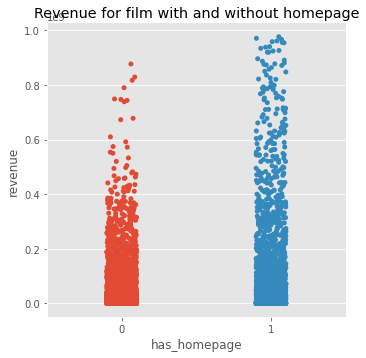

In [ ]:
sns.catplot(x='has_homepage', y='revenue', data=metadata);
plt.title('Revenue for film with and without homepage');

Films with homepage tend to generate more revenue! We suppose people can know more about the film thanks to homepage.

In [ ]:
metadata = metadata.drop('homepage',axis=1)

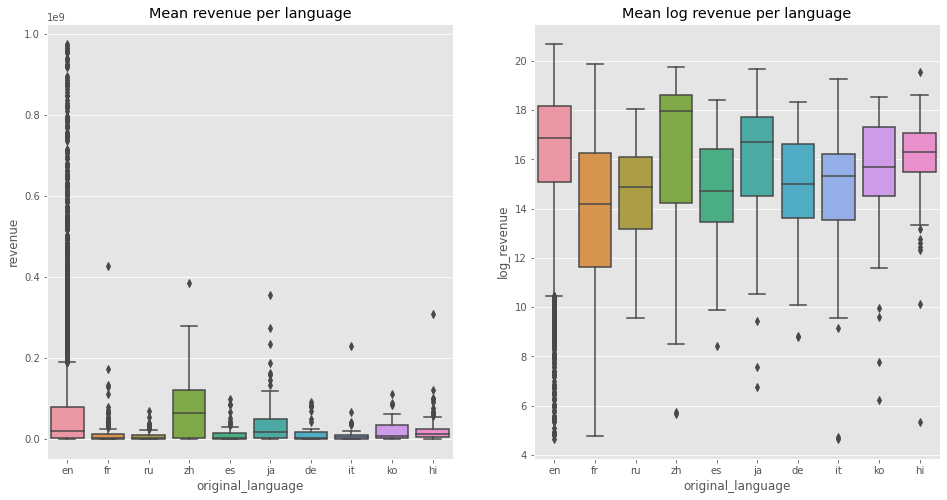

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=metadata.loc[metadata['original_language'].isin(metadata['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=metadata.loc[metadata['original_language'].isin(metadata['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

As we know there are much more english films and they have a higher range of values. Films with the highest revenue are usually in English, but there are also high revenue films in other languages.

# Title and Overview

Let's see which words are common in titles

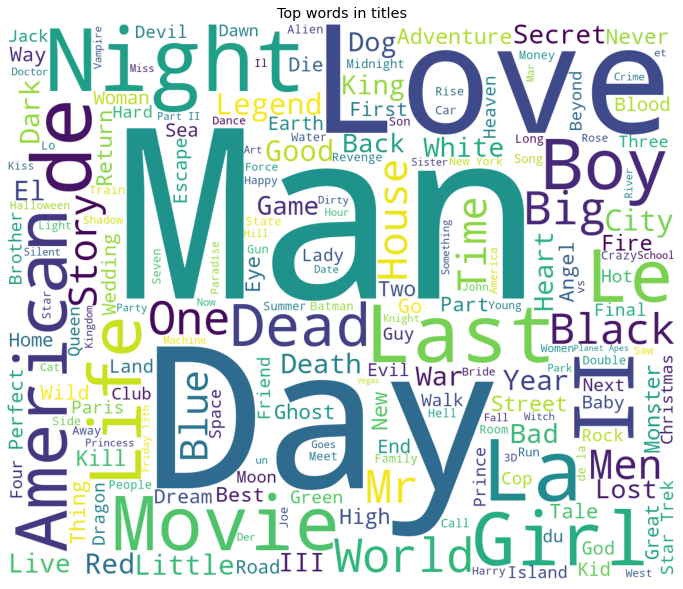

In [ ]:
plt.figure(figsize = (12, 12))
text = ' '.join(metadata['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

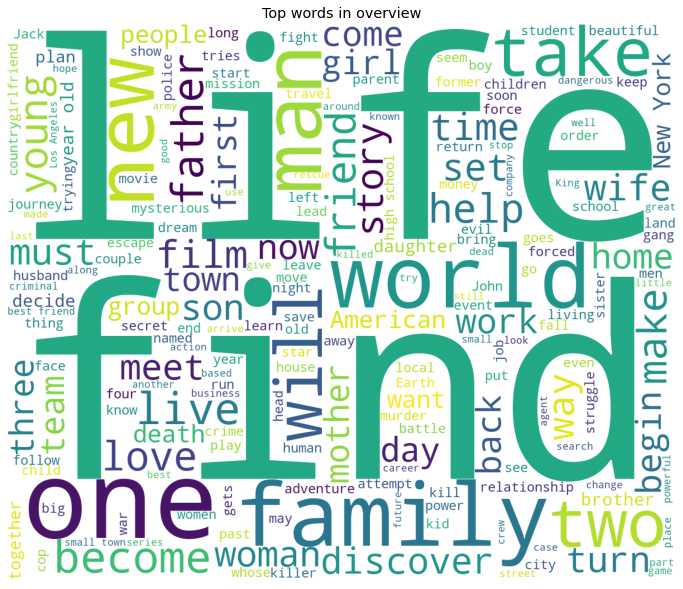

In [ ]:
plt.figure(figsize = (12, 12))
text = ' '.join(metadata['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(metadata['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, metadata['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
print('Target value:', metadata['log_revenue'][1000])
eli5.show_prediction(linreg, doc=metadata['overview'].values[1000], vec=vectorizer)

Target value: 17.7522145661593


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


We can see that some words can be used to predict revenue, but we will need more that overview text to build a good model.

# Popularity

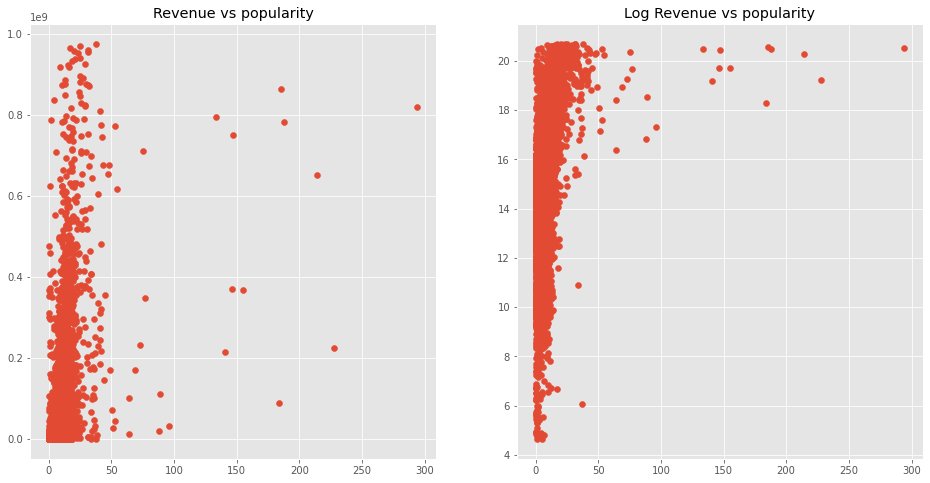

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(metadata['popularity'], metadata['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(metadata['popularity'], metadata['log_revenue'])
plt.title('Log Revenue vs popularity');

As we can see this is very skewed and this may be a useless feature

# Release Date

In [ ]:
metadata['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-02-10
4    1995-12-15
Name: release_date, dtype: object

In [ ]:
metadata.loc[metadata['release_date'].isnull() == True, 'release_date'] = '1998-01-01'

In [ ]:
metadata['release_date'] = pd.to_datetime(metadata['release_date'],format='%Y-%m-%d')

In [ ]:
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        print(part_col)
        print(df['release_date'][0])
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df

metadata = process_date(metadata)

release_date_year
1995-10-30 00:00:00
release_date_weekday
1995-10-30 00:00:00
release_date_month
1995-10-30 00:00:00
release_date_weekofyear
1995-10-30 00:00:00
release_date_day
1995-10-30 00:00:00
release_date_quarter
1995-10-30 00:00:00


Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
for i in date_parts:
  print(metadata['release_date' + "_" + i].head())

0    1995
1    1995
2    1995
3    1995
4    1995
Name: release_date_year, dtype: int64
0    0
1    4
2    4
3    4
4    4
Name: release_date_weekday, dtype: int64
0    10
1    12
2    12
3     2
4    12
Name: release_date_month, dtype: int64
0    44
1    50
2    51
3     6
4    50
Name: release_date_weekofyear, dtype: int64
0    30
1    15
2    22
3    10
4    15
Name: release_date_day, dtype: int64
0    4
1    4
2    4
3    1
4    4
Name: release_date_quarter, dtype: int64


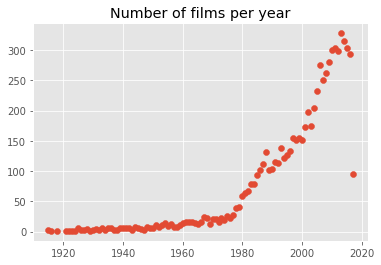

In [ ]:
d1 = metadata['release_date_year'].value_counts().sort_index()
plt.scatter(d1.index,d1.values)
plt.title("Number of films per year")
plt.show()

We can see that number of films and total revenue are growing, which is to be expected. But there were some years in the past with a high number of successful films, which brought high revenue.



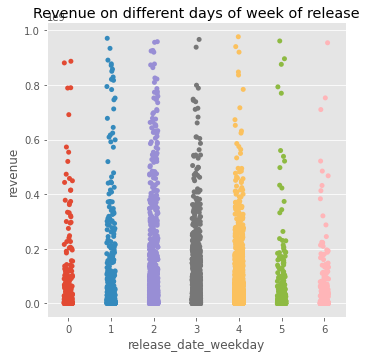

In [ ]:
sns.catplot(x='release_date_weekday', y='revenue', data=metadata);
plt.title('Revenue on different days of week of release');

# Run Time

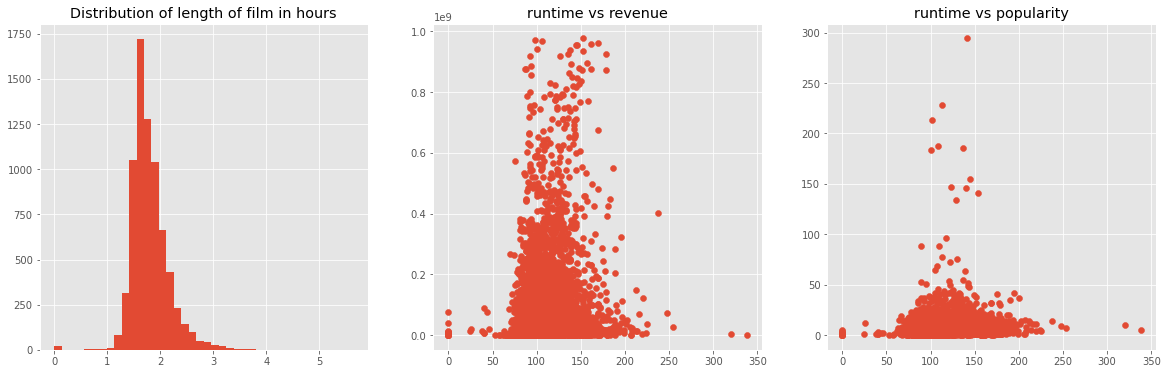

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(metadata['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(metadata['runtime'].fillna(0), metadata['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(metadata['runtime'].fillna(0), metadata['popularity'])
plt.title('runtime vs popularity');

It seems that most of the films are 1.5-2 hour long and films with the highest revenue are also in this range

# Status

In [ ]:
metadata['status'].value_counts()

Released           7248
Rumored               5
Post Production       5
Name: status, dtype: int64

As we can see only 2 films does not have status = Released so clearly this feature is useless

In [ ]:
metadata = metadata.drop('status', axis = 1)

# Tagline

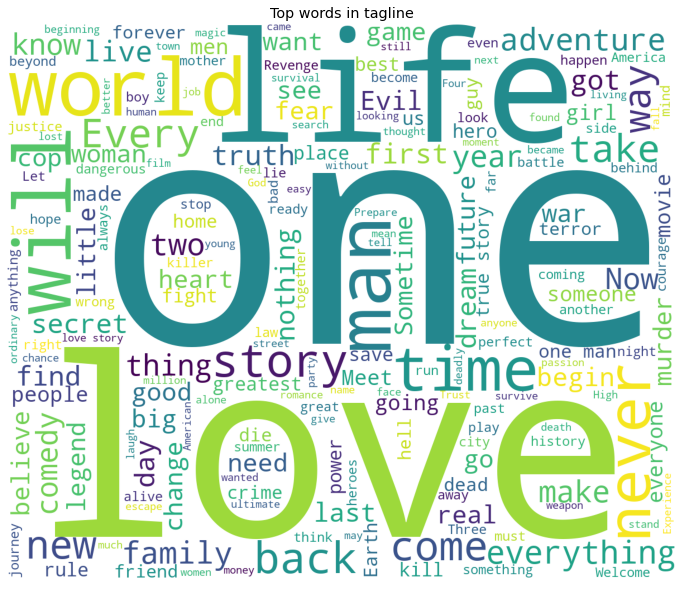

In [ ]:
plt.figure(figsize = (12, 12))
text = ' '.join(metadata['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

# Collections

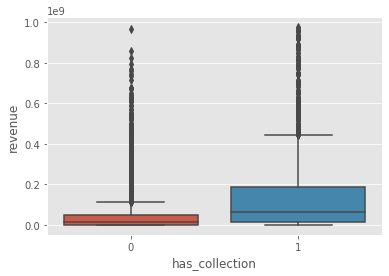

In [ ]:
sns.boxplot(x='has_collection', y='revenue', data=metadata);

Films, which are part of a collection usually have higher revenues. I suppose such films have a bigger fan base thanks to previous films.

# Genres

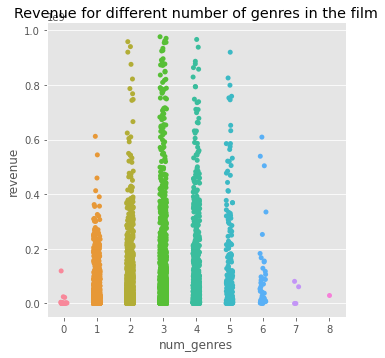

In [ ]:
sns.catplot(x='num_genres', y='revenue', data=metadata);
plt.title('Revenue for different number of genres in the film');

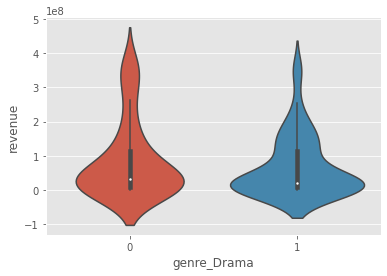

In [ ]:
sns.violinplot(x='genre_Drama', y='revenue', data=metadata[:100]);

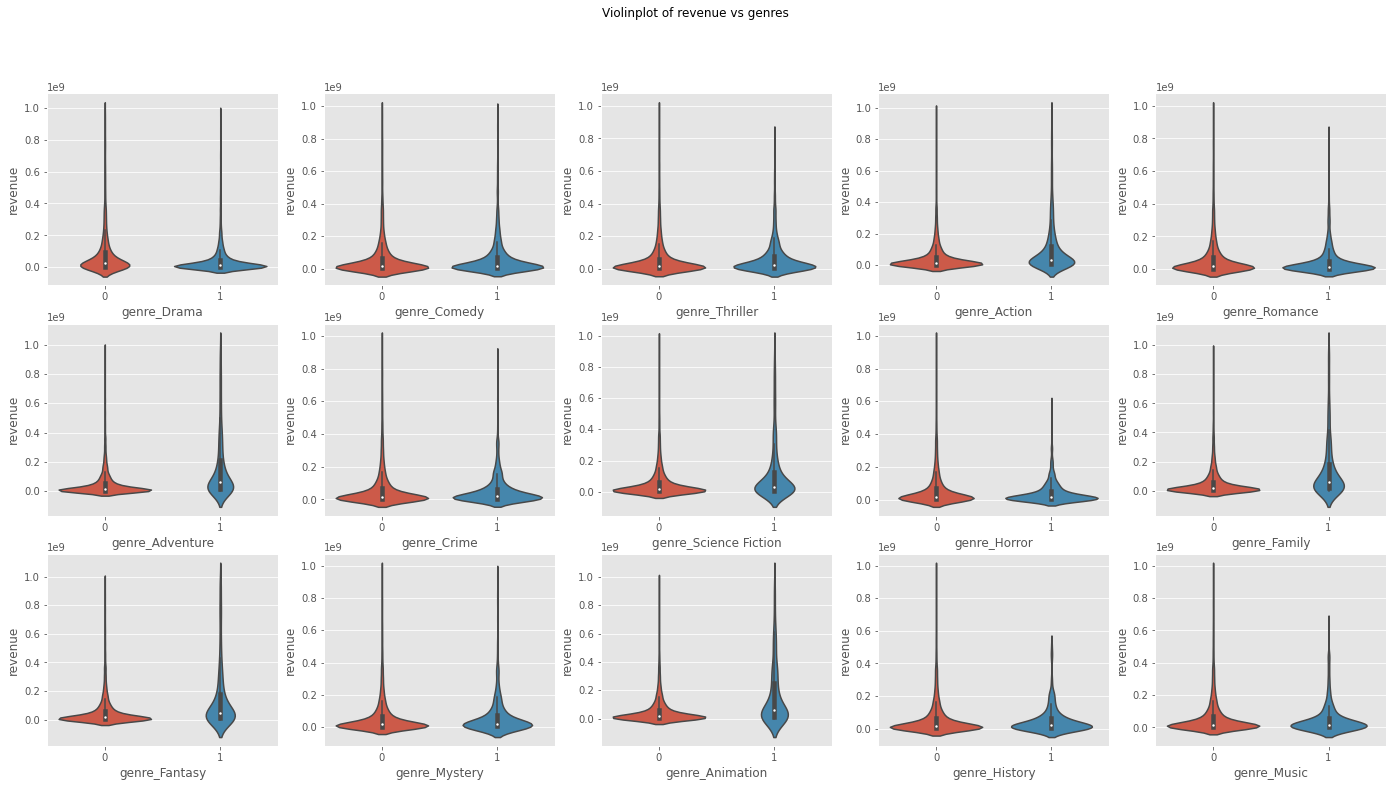

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in metadata.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

Some genres tend to have less revenue, some tend to have higher.

# Production Companies

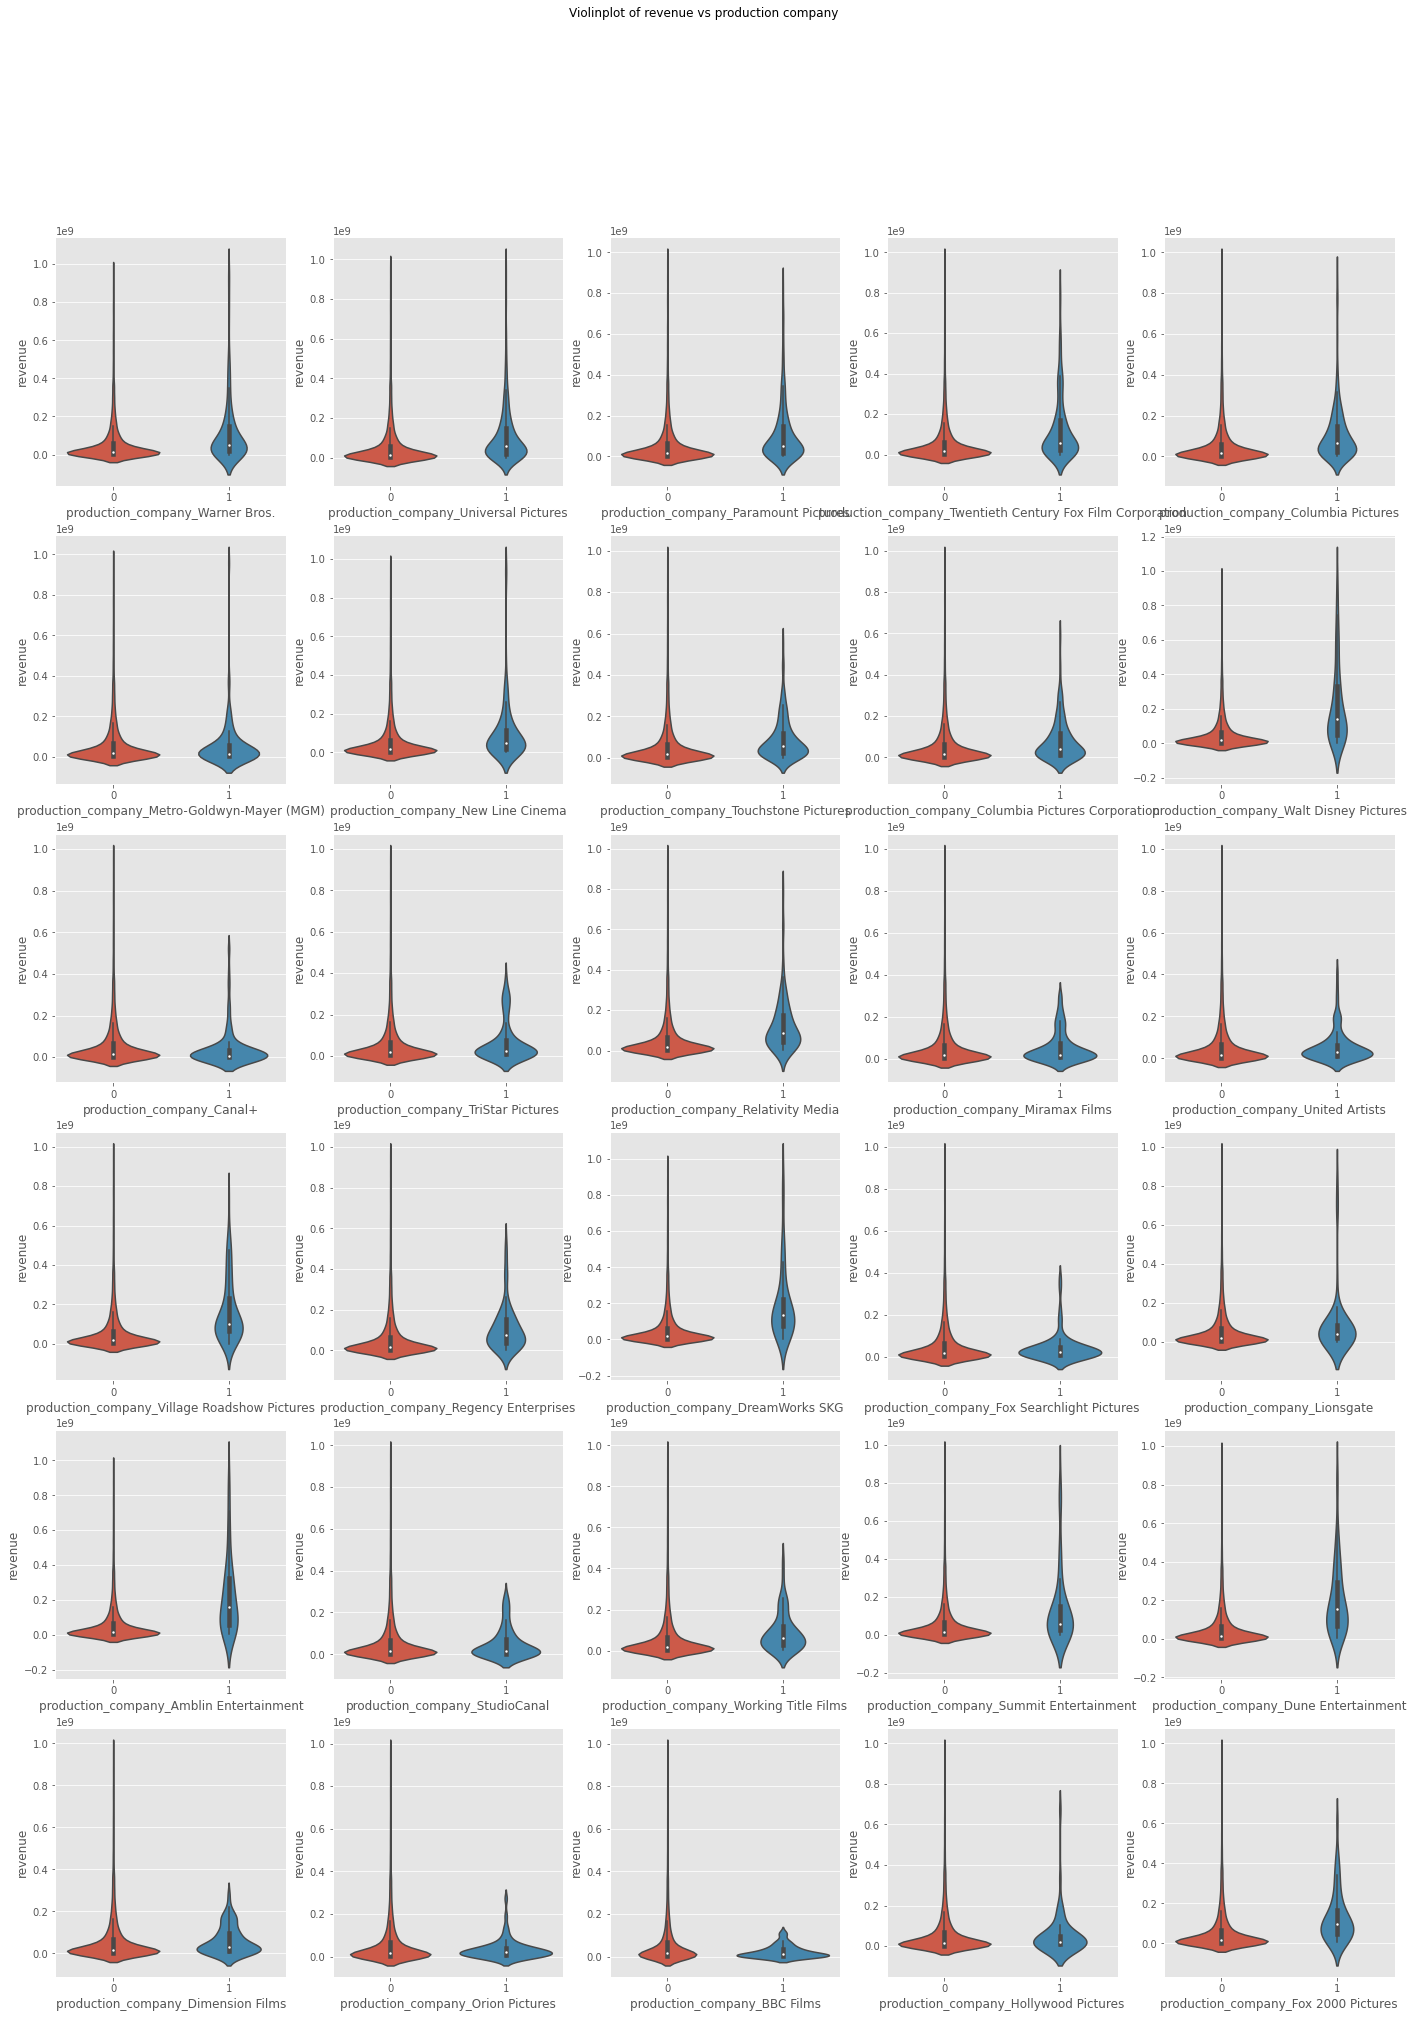

In [ ]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production company')
for i, e in enumerate([col for col in metadata.columns if 'production_company' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

There are only a couple of companies, which have distinctly higher revenues compared to others.

# Production countries

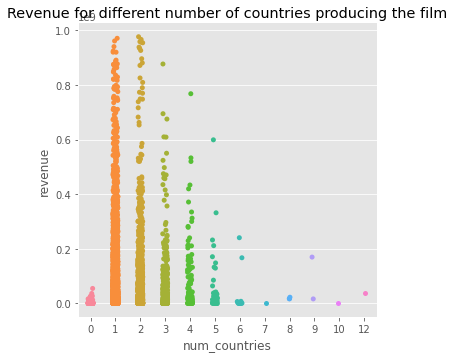

In [ ]:
sns.catplot(x='num_countries', y='revenue', data=metadata);
plt.title('Revenue for different number of countries producing the film');

In fact I think that number of production countries hardly matters. Most films are produced by 1-2 companies, so films with 1-2 companies have the highest revenue.

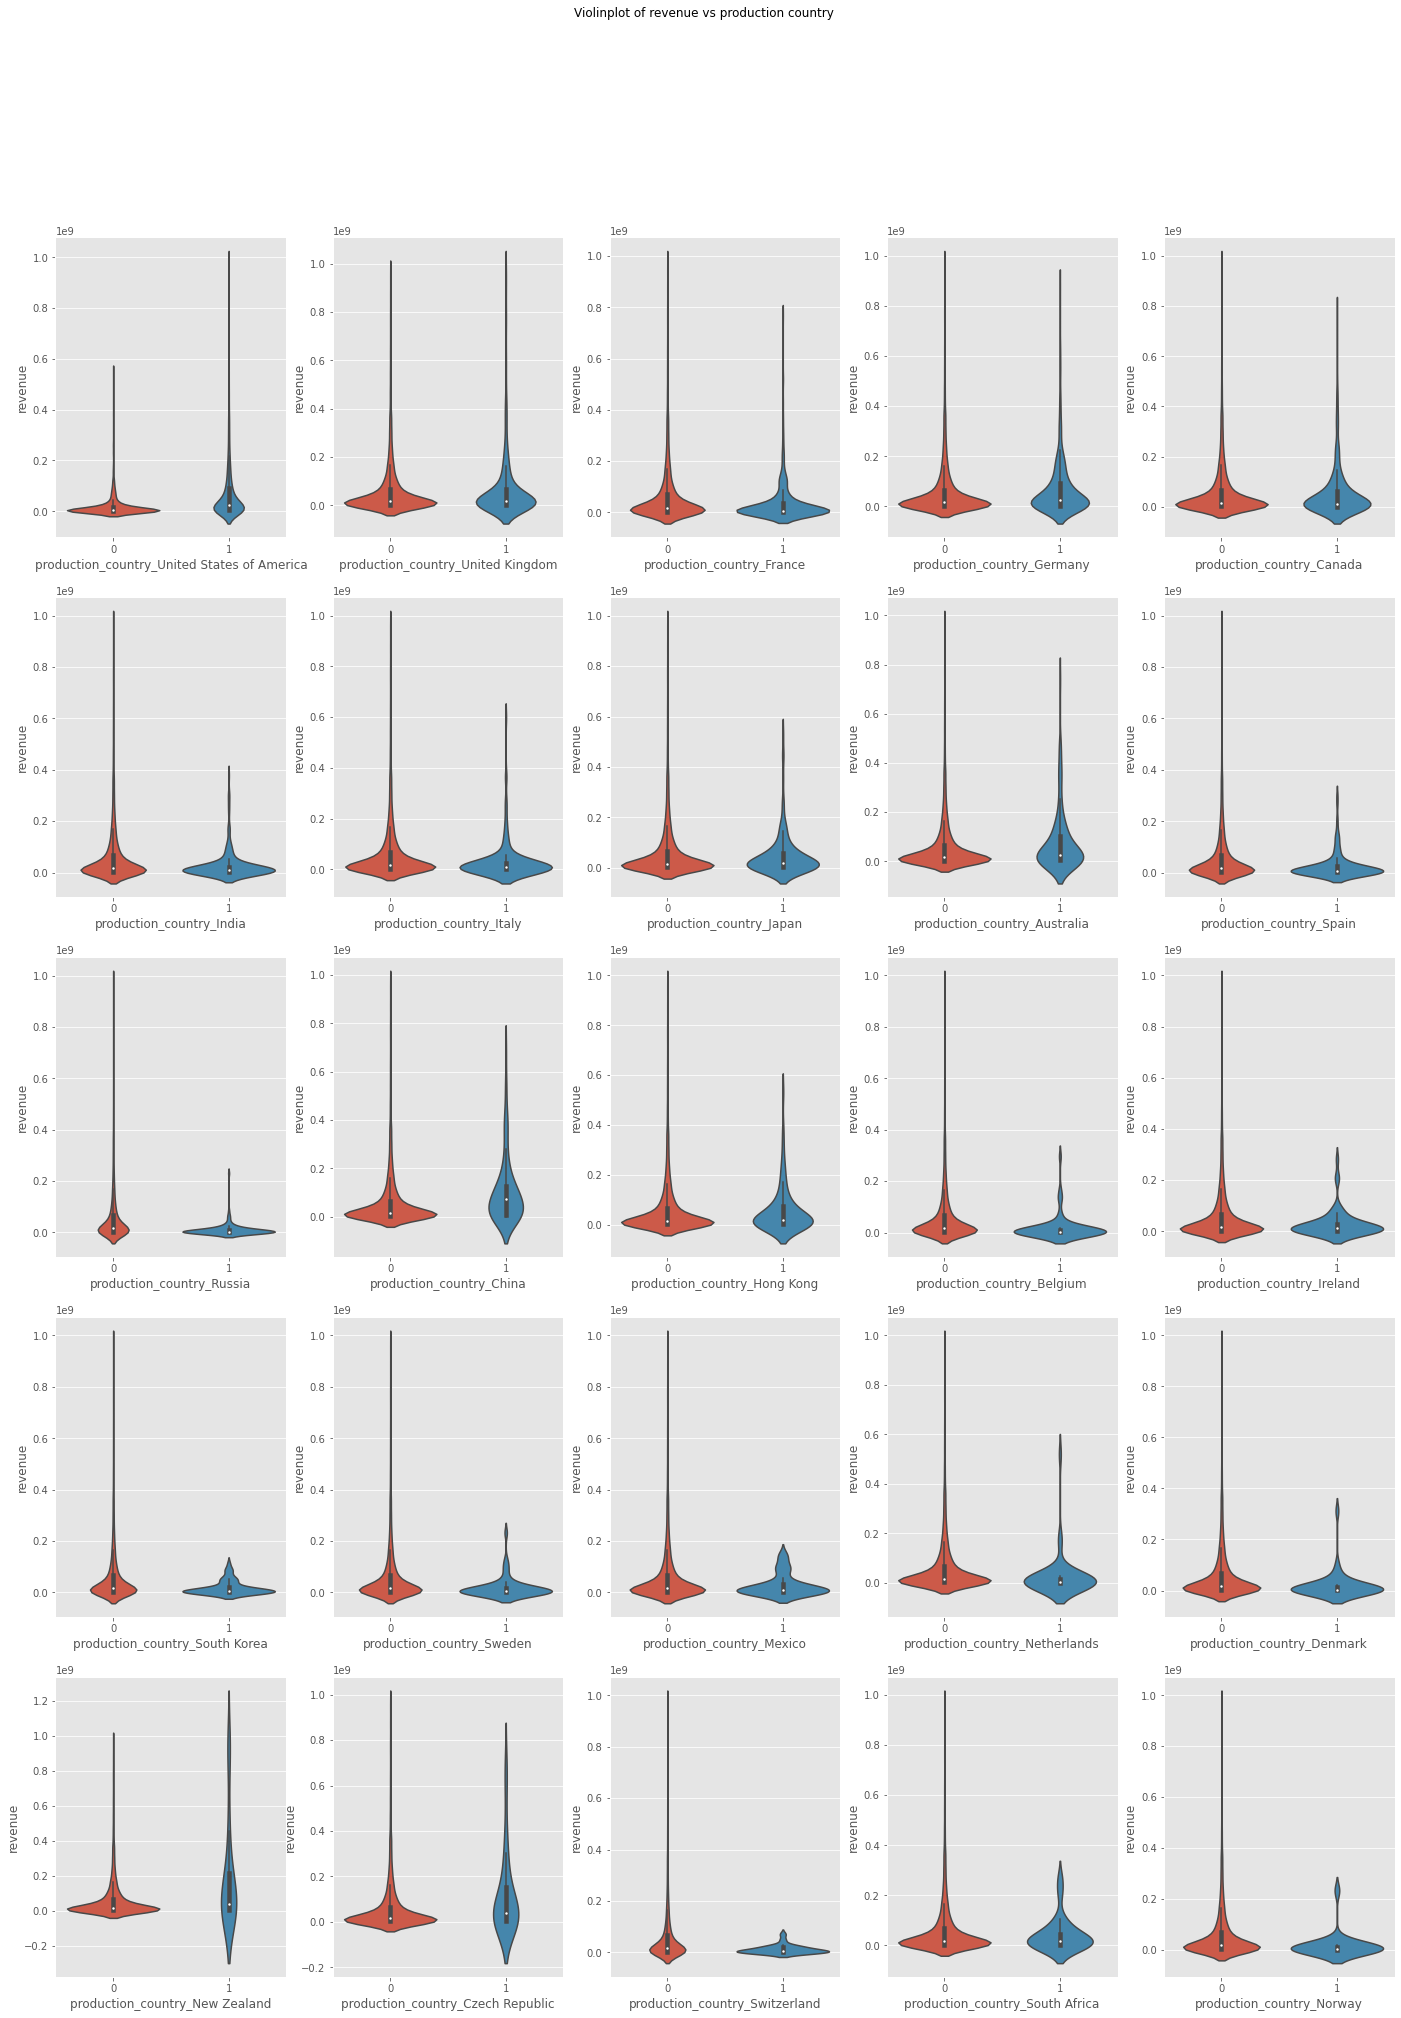

In [ ]:
f, axes = plt.subplots(5, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production country')
for i, e in enumerate([col for col in metadata.columns if 'production_country' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

There are only a couple of countries, which have distinctly higher revenues compared to others.

# Cast

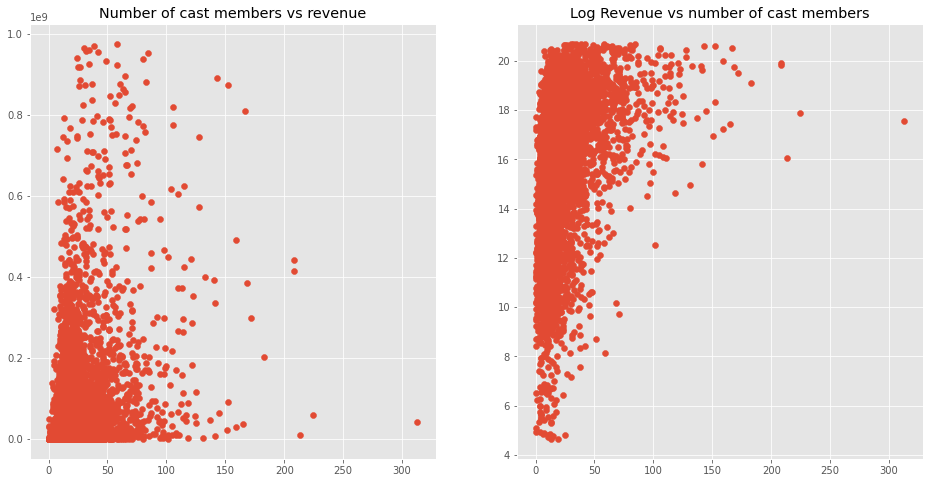

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(metadata['num_cast'], metadata['revenue'])
plt.title('Number of cast members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(metadata['num_cast'], metadata['log_revenue'])
plt.title('Log Revenue vs number of cast members');

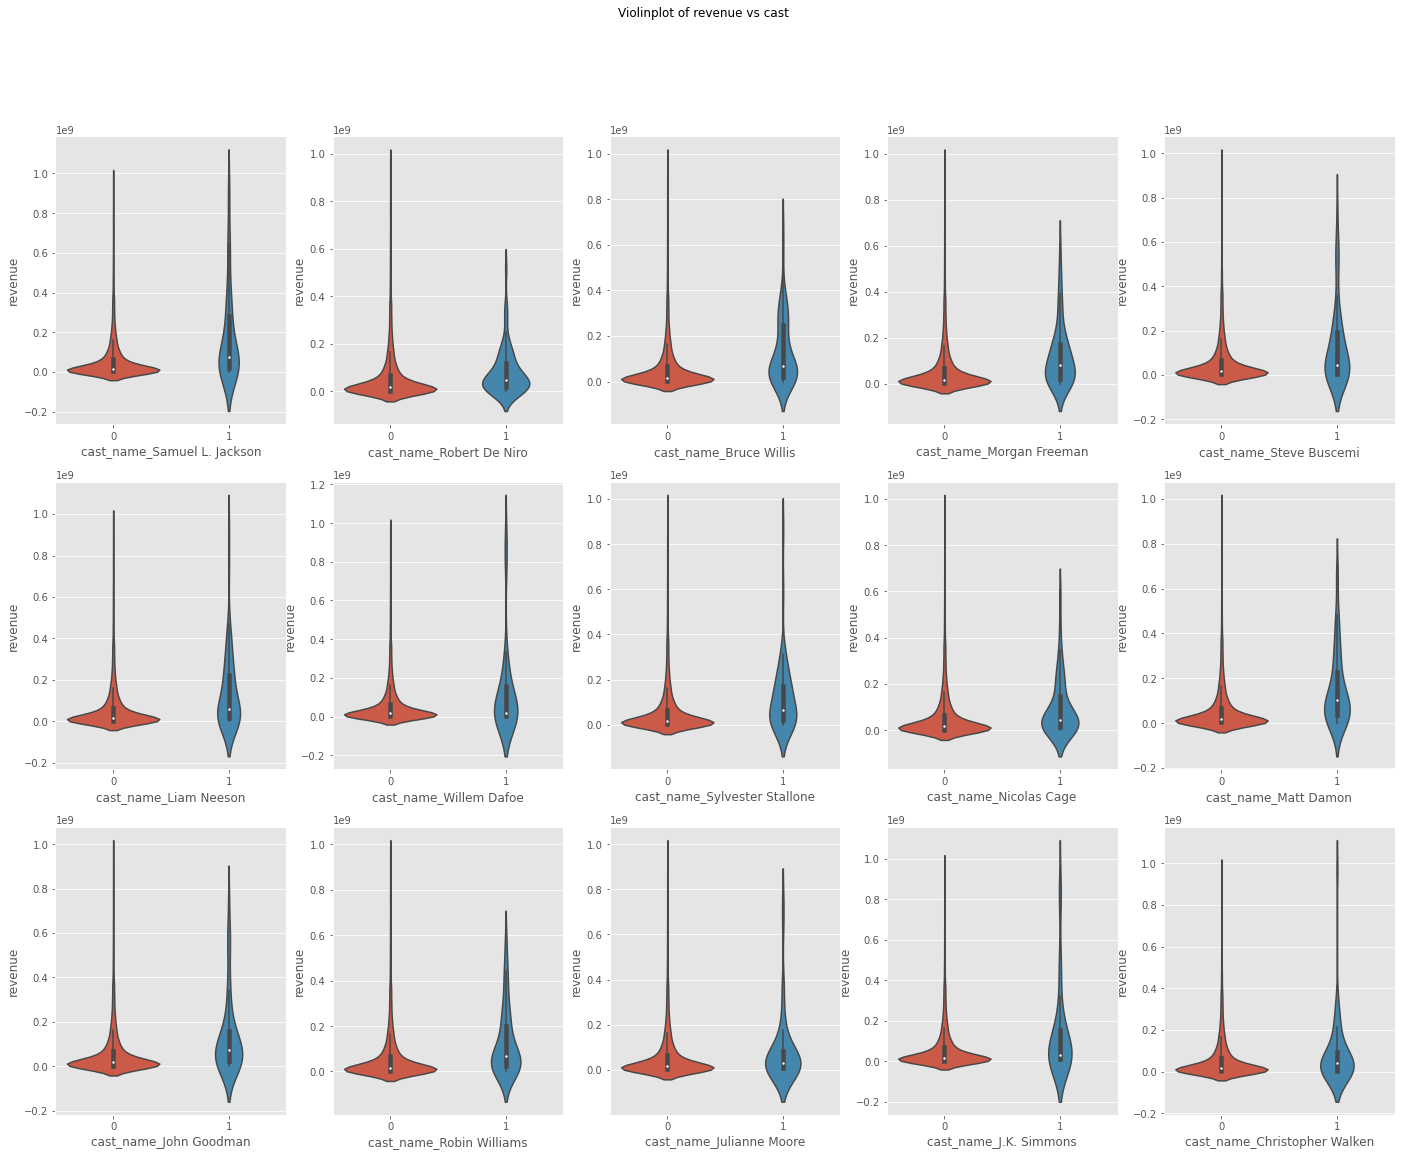

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in metadata.columns if 'cast_name' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

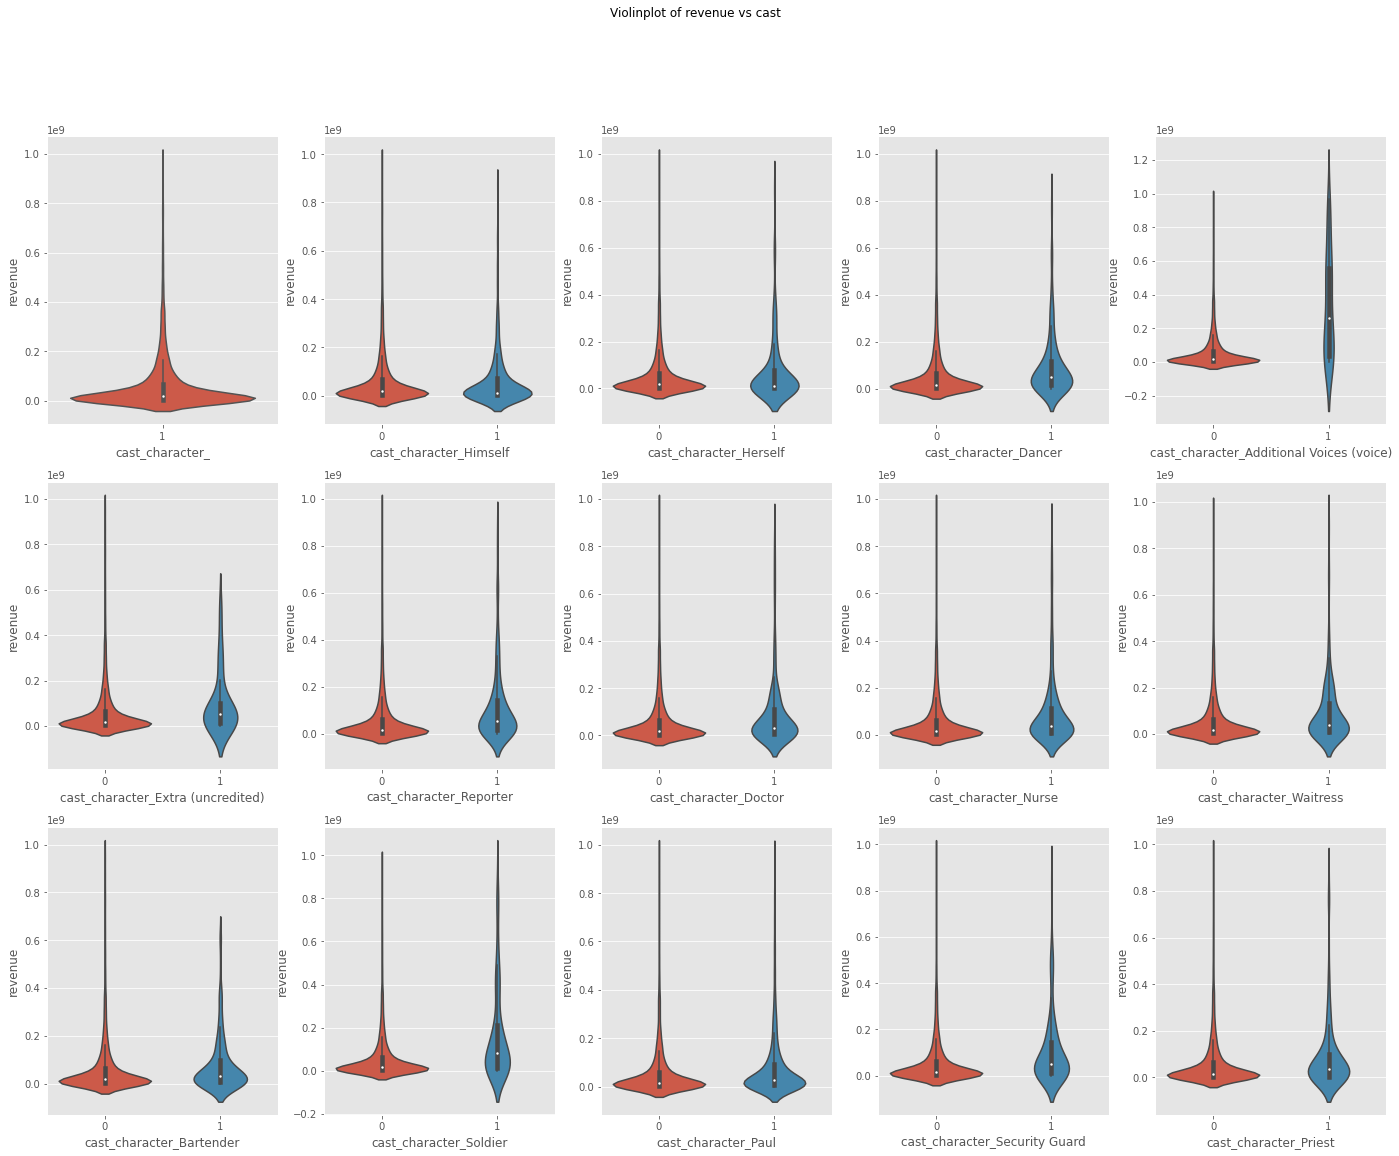

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in metadata.columns if 'cast_character_' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

# Keywords

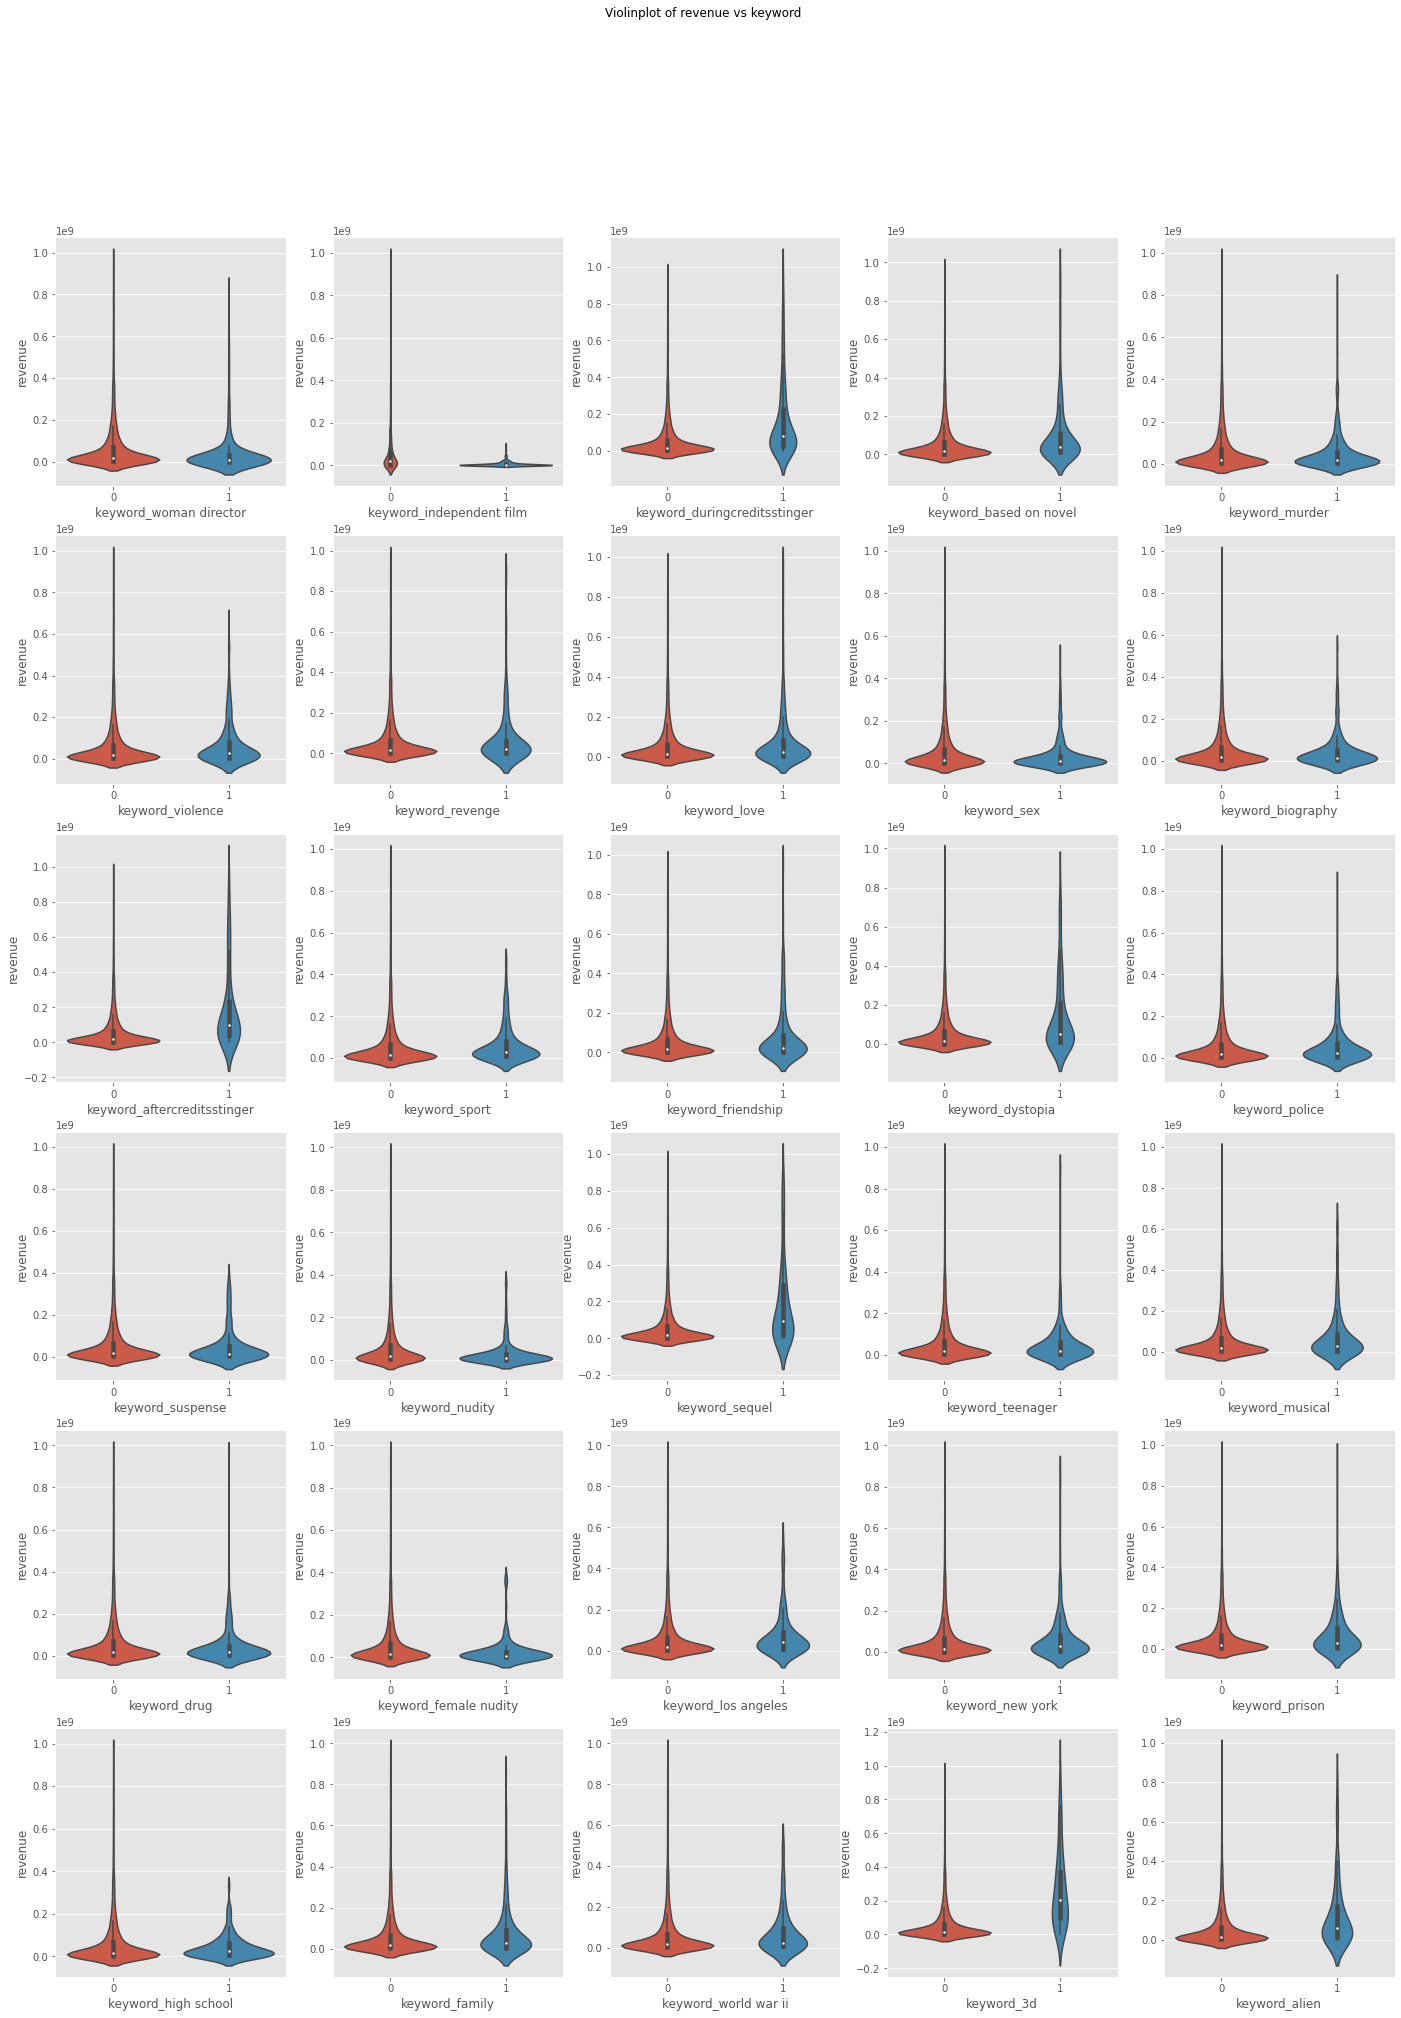

In [ ]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs keyword')
for i, e in enumerate([col for col in metadata.columns if 'keyword_' in col]):
    sns.violinplot(x=e, y='revenue', data=metadata, ax=axes[i // 5][i % 5]);

# Crew

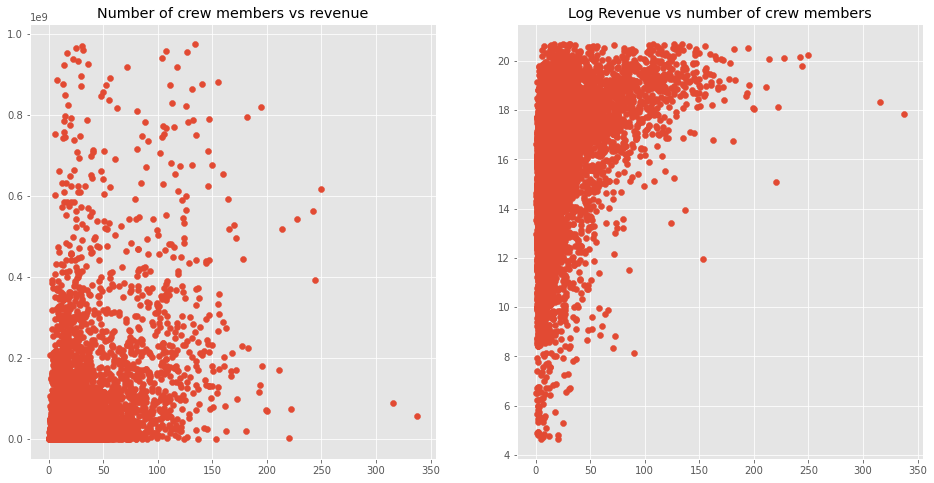

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(metadata['num_crew'], metadata['revenue'])
plt.title('Number of crew members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(metadata['num_crew'], metadata['log_revenue'])
plt.title('Log Revenue vs number of crew members');

# Modelling and feature generation

In [ ]:
s = ','.join(metadata.columns)
print(s)

adult,budget,id,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,tagline,title,video,vote_average,vote_count,log_revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Columbia Pictures Corporation,production_company_Walt Disney Pictures,production_company_Canal+,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Miramax Films,prod

In [ ]:
metadata = metadata.drop(['imdb_id', 'poster_path', 'release_date'], axis=1)

In [ ]:
for col in ['original_language', 'collection_name', 'all_genres']:
    le = LabelEncoder()
    print(col)
    le.fit(metadata[col].fillna('').astype(str))
    metadata[col] = le.transform(metadata[col].fillna('').astype(str))

original_language
collection_name
all_genres


In [ ]:
metadata_texts = metadata[['title', 'tagline', 'overview', 'original_title']]

In [ ]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    metadata['len_' + col] = metadata[col].fillna('').apply(lambda x: len(str(x)))
    metadata['words_' + col] = metadata[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    metadata = metadata.drop(col, axis=1)

In [ ]:
for col in ['adult']:
    le = LabelEncoder()
    print(col)
    le.fit(metadata[col].fillna('').astype(str))
    metadata[col] = le.transform(metadata[col].fillna('').astype(str))

adult


In [ ]:
metadata.vote_count

0       5415
1       2413
2         34
3        173
4       1886
        ... 
7263       4
7264       3
7265       6
7266       3
7267       1
Name: vote_count, Length: 7259, dtype: object

In [ ]:
datatype_dict = {"vote_count": np.int64,
                   "vote_average": np.float64
                 }
metadata = metadata.astype(datatype_dict, copy=True)

In [ ]:
X = metadata.drop(['id', 'revenue','log_revenue','video'], axis=1)
y = metadata['log_revenue']

In [ ]:
Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(X, y, test_size=0.1)

In [ ]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(Xx_train, yy_train, 
        eval_set=[(Xx_train, yy_train), (Xx_valid, yy_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.21282	valid_1's rmse: 1.42361
[2000]	training's rmse: 1.03893	valid_1's rmse: 1.40527
Early stopping, best iteration is:
[2606]	training's rmse: 0.955445	valid_1's rmse: 1.40266


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_data_in_leaf=20, n_estimators=20000, nthread=4, num_leaves=30,
              objective='regression', verbosity=-1)

In [ ]:
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

In [ ]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [ ]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y.values[train_index], y.values[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

Fold 0 started at Wed Apr 13 11:42:25 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.15284	valid_1's rmse: 1.43779
[2000]	training's rmse: 0.952892	valid_1's rmse: 1.4282
Early stopping, best iteration is:
[1876]	training's rmse: 0.973781	valid_1's rmse: 1.42709
Fold 1 started at Wed Apr 13 11:42:33 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.14225	valid_1's rmse: 1.57785
[2000]	training's rmse: 0.945273	valid_1's rmse: 1.56535
[3000]	training's rmse: 0.796873	valid_1's rmse: 1.55894
[4000]	training's rmse: 0.67709	valid_1's rmse: 1.55231
Early stopping, best iteration is:
[3872]	training's rmse: 0.691158	valid_1's rmse: 1.55201
Fold 2 started at Wed Apr 13 11:42:47 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.13648	valid_1's rmse: 1.57098
Early stopping, best iteration is:
[1442]	training's rmse: 1.03549	valid_1's rmse: 1.56683
Fold 3 starte

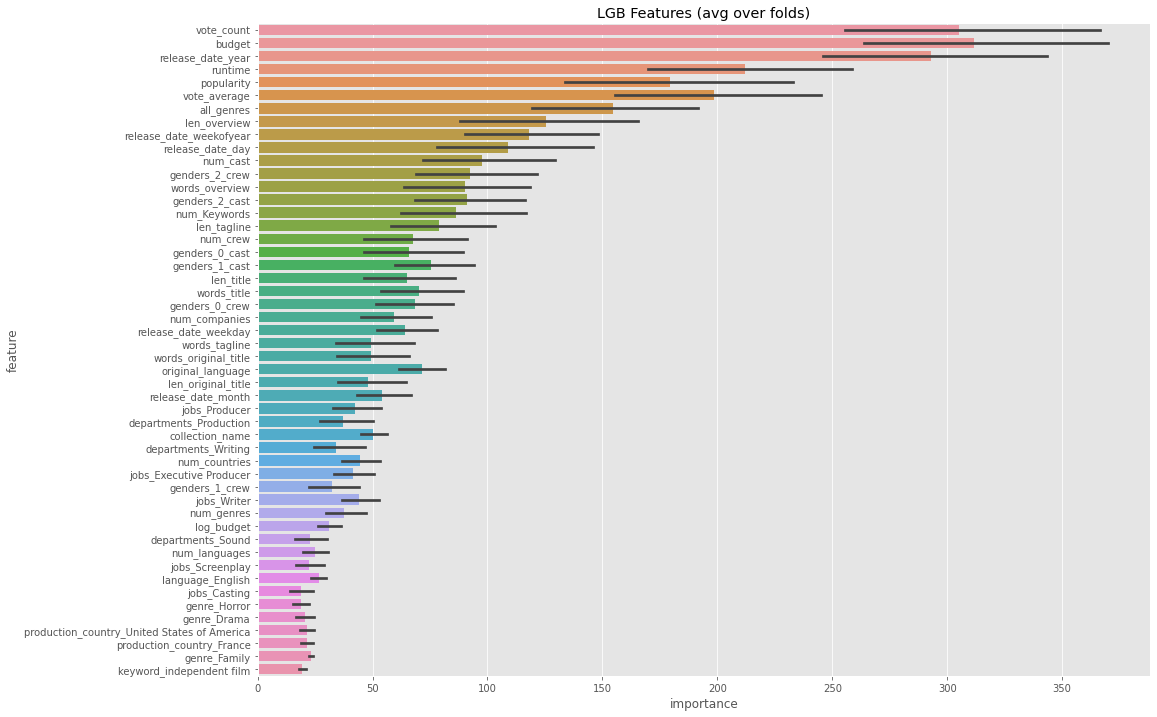

In [ ]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 10,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(Xx_train, Xx_valid, yy_train, params=params, model_type='lgb', plot_feature_importance=True)

In [ ]:
gg = np.exp(prediction_lgb) - 1
gg_valid = np.exp(yy_valid) - 1

In [ ]:
mean_squared_error(gg_valid,gg) ** 0.5

57005177.697396666

OOF features based on texts

In [ ]:
# for col in metadata_texts.columns:
#     vectorizer = TfidfVectorizer(
#                 sublinear_tf=True,
#                 analyzer='word',
#                 token_pattern=r'\w{1,}',
#                 ngram_range=(1, 2),
#                 min_df=10
#     )
#     vectorizer.fit(metadata_texts[col].fillna(''))
#     train_col_text = vectorizer.transform(metadata_texts[col].fillna(''))
#     model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
#     # oof_text, prediction_text = train_model(train_col_text, test_col_text, y, params=None, model_type='sklearn', model=model)
    
#     X[col + '_oof'] = oof_text
#     # X_test[col + '_oof'] = prediction_text

In [ ]:
X.head()

adult    budget  original_language  popularity  runtime  vote_average  \
0      0  30000000                 10   21.946943     81.0           7.7   
1      0  65000000                 10   17.015539    104.0           6.9   
2      0  16000000                 10    3.859495    127.0           6.1   
3      0         0                 10    8.387519    106.0           5.7   
4      0  60000000                 10   17.924927    170.0           7.7   

   vote_count  collection_name  has_collection  num_genres  all_genres  \
0        5415              683               1           3         444   
1        2413                1               0           3         403   
2          34                1               0           3         539   
3         173              210               1           1         479   
4        1886                1               0           4         201   

   genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  \
0            0             1               0             0              0   
1            0             0               0             0              0   
2            1             1               0             0              1   
3            0             1               0             0              0   
4            1             0               1             1              0   

   genre_Adventure  genre_Crime  genre_Science Fiction  genre_Horror  \
0                0            0                      0             0   
1                1            0                      0             0   
2                0            0                      0             0   
3                0            0                      0             0   
4                0            1                      0             0   

   genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  \
0             1              0              0                1              0   
1             1              1              0                0              0   
2             0              0              0                0              0   
3             0              0              0                0              0   
4             0              0              0                0              0   

   genre_Music  num_companies  production_company_Warner Bros.  \
0            0              1                                0   
1            0              3                                0   
2            0              1                                0   
3            0              2                                0   
4            0              3                                1   

   production_company_Universal Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Paramount Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  1           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             0   
1                                            

In [ ]:
def new_features(df):
    df['budget_to_popularity'] = df['budget'] / df['popularity']
    df['budget_to_runtime'] = df['budget'] / df['runtime']
    
    # some features from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
    df['_budget_year_ratio'] = df['budget'] / (df['release_date_year'] * df['release_date_year'])
    df['_releaseYear_popularity_ratio'] = df['release_date_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_date_year']
    
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby("release_date_year")["runtime"].transform('mean')
    df['popularity_to_mean_year'] = df['popularity'] / df.groupby("release_date_year")["popularity"].transform('mean')
    df['budget_to_mean_year'] = df['budget'] / df.groupby("release_date_year")["budget"].transform('mean')
        
    return df

In [ ]:
X = new_features(X)

Fold 0 started at Wed Apr 13 11:44:06 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.13466	valid_1's rmse: 1.55134
[2000]	training's rmse: 0.922792	valid_1's rmse: 1.53248
[3000]	training's rmse: 0.763156	valid_1's rmse: 1.52689
[4000]	training's rmse: 0.634252	valid_1's rmse: 1.52346
Early stopping, best iteration is:
[3954]	training's rmse: 0.639502	valid_1's rmse: 1.5231
Fold 1 started at Wed Apr 13 11:44:24 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.13482	valid_1's rmse: 1.54239
Early stopping, best iteration is:
[1706]	training's rmse: 0.977334	valid_1's rmse: 1.52889
Fold 2 started at Wed Apr 13 11:44:33 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.12823	valid_1's rmse: 1.52576
[2000]	training's rmse: 0.917132	valid_1's rmse: 1.51005
Early stopping, best iteration is:
[2551]	training's rmse: 0.827193	valid_1's rmse: 1.50397
Fold 3 star

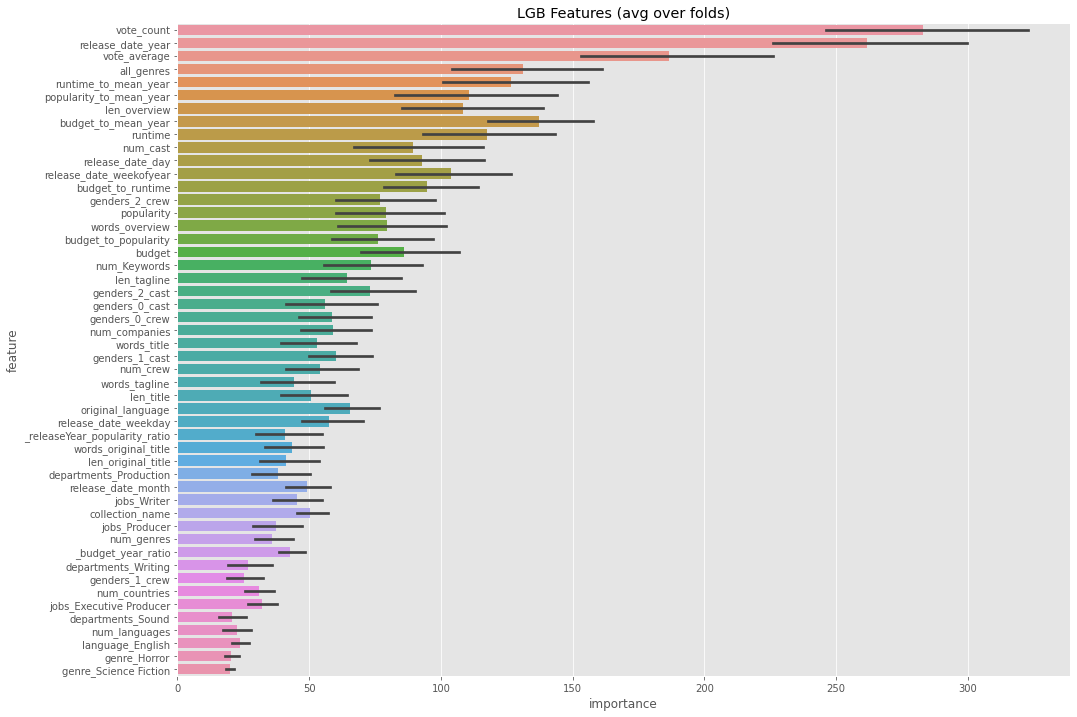

In [ ]:
Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(X, y, test_size=0.1)
oof_lgb, prediction_lgb, _ = train_model(Xx_train, Xx_valid, yy_train, params=params, model_type='lgb', plot_feature_importance=True)

In [ ]:
gg = np.exp(prediction_lgb) - 1
gg_valid = np.exp(yy_valid) - 1

In [ ]:
mean_squared_error(gg_valid,gg) ** 0.5

59684525.38488366

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 6,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.1135	valid_1's rmse: 1.43967
[2000]	training's rmse: 0.898255	valid_1's rmse: 1.42227
Early stopping, best iteration is:
[2249]	training's rmse: 0.854178	valid_1's rmse: 1.41945


100%|===================| 6521/6533 [09:29<00:01]       

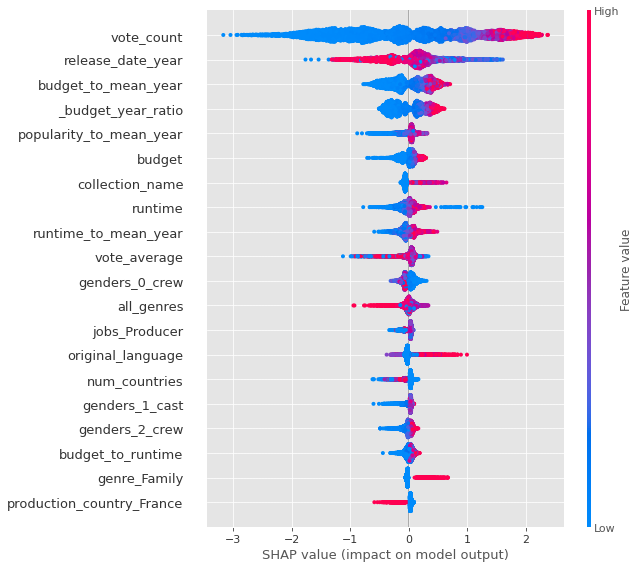

In [ ]:
explainer = shap.TreeExplainer(model1, X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

invalid value encountered in subtract


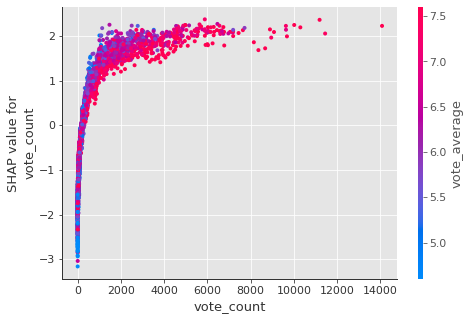

invalid value encountered in subtract


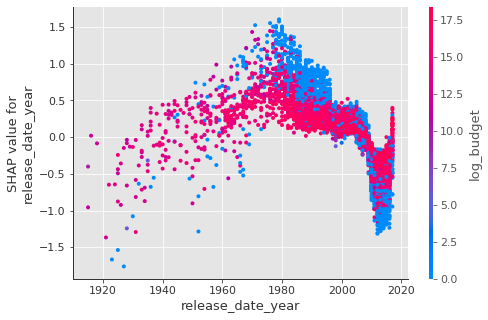

invalid value encountered in subtract


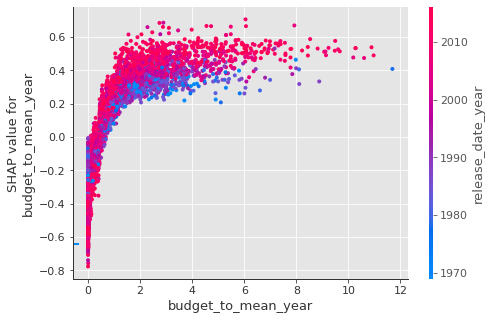

invalid value encountered in subtract


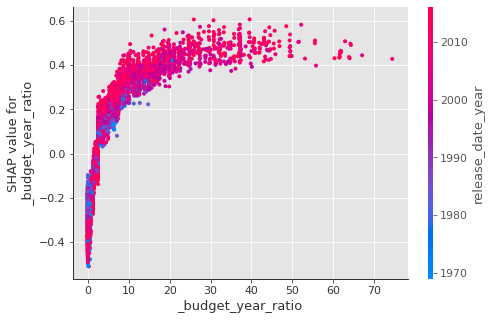

invalid value encountered in subtract


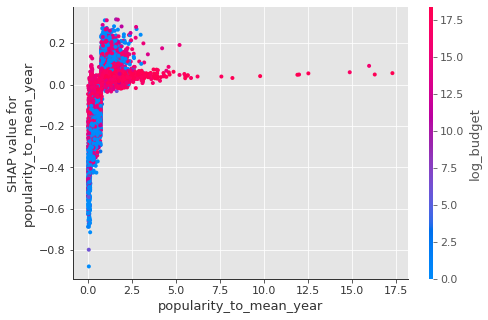

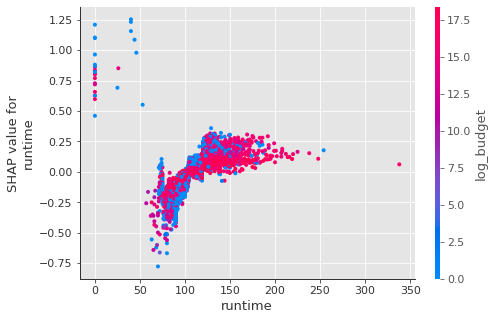

invalid value encountered in subtract


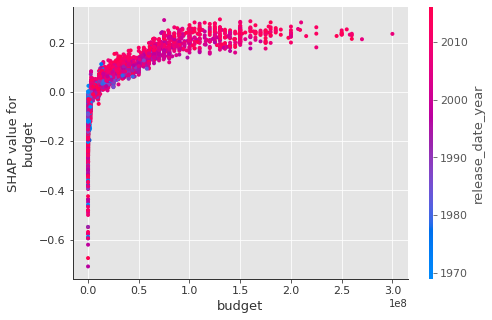

invalid value encountered in subtract


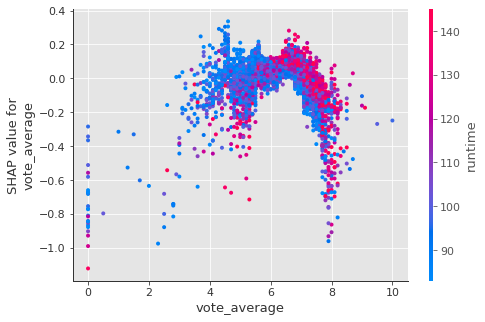

invalid value encountered in subtract


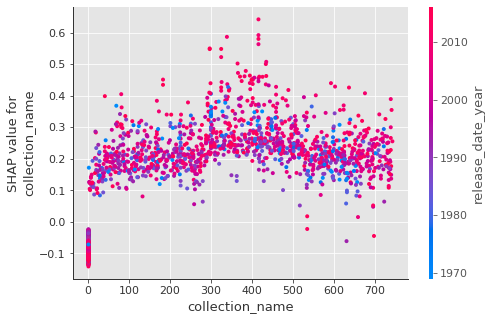

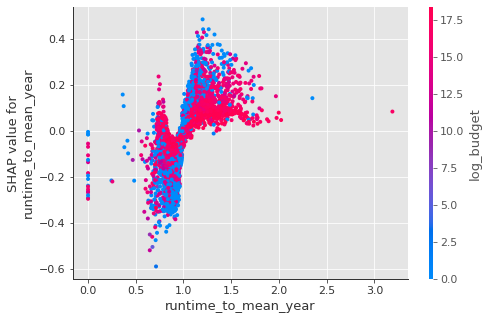

In [ ]:
top_cols = X_train.columns[np.argsort(shap_values.std(0))[::-1]][:10]
for col in top_cols:
    shap.dependence_plot(col, shap_values, X_train)

In [ ]:
def top_cols_interaction(df):
    df['vote_count_to_vote_average'] = df['vote_count'] / df['vote_average']
    df['budget_to_year'] = df['budget'] / df['release_date_year']
    df['budget_to_mean_year_to_year'] = df['budget_to_mean_year'] / df['release_date_year']
    df['popularity_to_mean_year_to_log_budget'] = df['popularity_to_mean_year'] / df['log_budget']
    df['year_to_log_budget'] = df['release_date_year'] / df['log_budget']
    df['budget_to_runtime_to_year'] = df['budget_to_runtime'] / df['release_date_year']
    df['genders_1_cast_to_log_budget'] = df['genders_1_cast'] / df['log_budget']
    df['all_genres_to_popularity_to_mean_year'] = df['all_genres'] / df['popularity_to_mean_year']
    df['genders_2_crew_to_budget_to_mean_year'] = df['genders_2_crew'] / df['budget_to_mean_year']
    
    return df

In [ ]:
X = top_cols_interaction(X)

In [ ]:
X.head()

adult    budget  original_language  popularity  runtime  vote_average  \
0      0  30000000                 10   21.946943     81.0           7.7   
1      0  65000000                 10   17.015539    104.0           6.9   
2      0  16000000                 10    3.859495    127.0           6.1   
3      0         0                 10    8.387519    106.0           5.7   
4      0  60000000                 10   17.924927    170.0           7.7   

   vote_count  collection_name  has_collection  num_genres  all_genres  \
0        5415              683               1           3         444   
1        2413                1               0           3         403   
2          34                1               0           3         539   
3         173              210               1           1         479   
4        1886                1               0           4         201   

   genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  \
0            0             1               0             0              0   
1            0             0               0             0              0   
2            1             1               0             0              1   
3            0             1               0             0              0   
4            1             0               1             1              0   

   genre_Adventure  genre_Crime  genre_Science Fiction  genre_Horror  \
0                0            0                      0             0   
1                1            0                      0             0   
2                0            0                      0             0   
3                0            0                      0             0   
4                0            1                      0             0   

   genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  \
0             1              0              0                1              0   
1             1              1              0                0              0   
2             0              0              0                0              0   
3             0              0              0                0              0   
4             0              0              0                0              0   

   genre_Music  num_companies  production_company_Warner Bros.  \
0            0              1                                0   
1            0              3                                0   
2            0              1                                0   
3            0              2                                0   
4            0              3                                1   

   production_company_Universal Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Paramount Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  1           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             0   
1                                            

In [ ]:
X = X.replace([np.inf, -np.inf], 0).fillna(0)

Fold 0 started at Wed Apr 13 12:07:10 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 0.963172	valid_1's rmse: 1.48628
Early stopping, best iteration is:
[1287]	training's rmse: 0.871429	valid_1's rmse: 1.48342
Fold 1 started at Wed Apr 13 12:07:42 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 0.964575	valid_1's rmse: 1.50545
Early stopping, best iteration is:
[1206]	training's rmse: 0.896575	valid_1's rmse: 1.50157
Fold 2 started at Wed Apr 13 12:07:59 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 0.969397	valid_1's rmse: 1.50466
[2000]	training's rmse: 0.70269	valid_1's rmse: 1.4915
Early stopping, best iteration is:
[2432]	training's rmse: 0.618101	valid_1's rmse: 1.48967
Fold 3 started at Wed Apr 13 12:08:24 2022
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 0.971327	valid_1's rmse: 1.44766
[2000]	training's

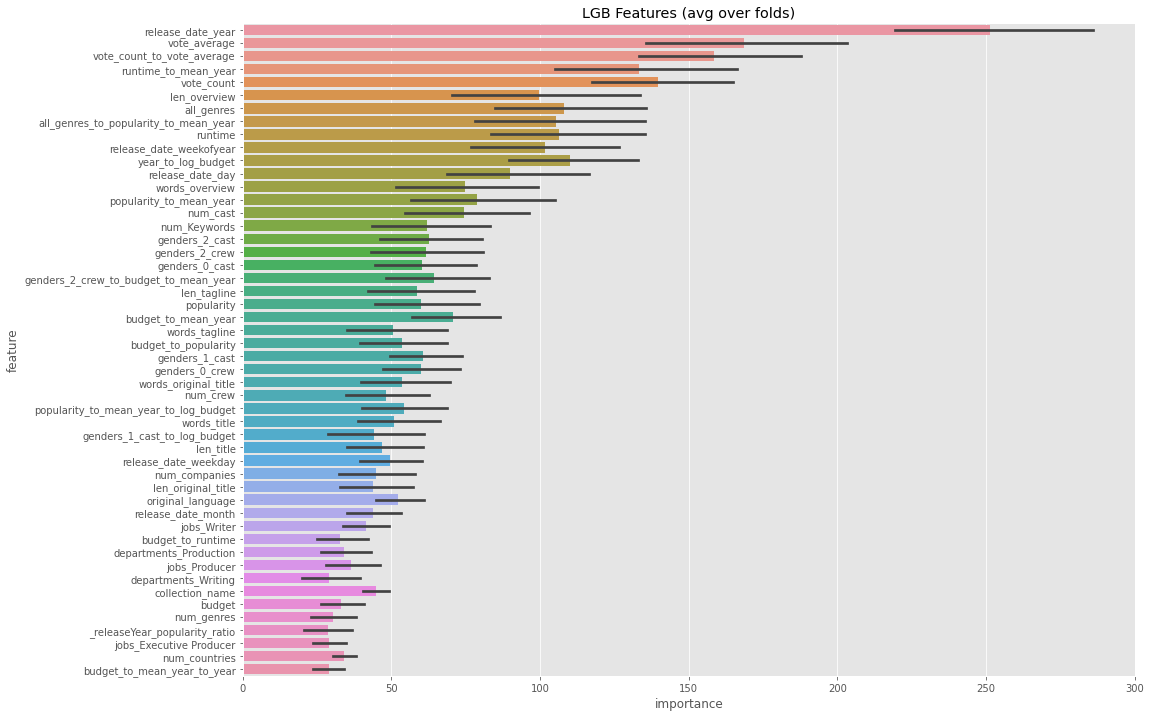

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 9,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(X_train, X_valid, y_train, params=params, model_type='lgb', plot_feature_importance=True)

In [ ]:
gg = np.exp(prediction_lgb) - 1
gg_valid = np.exp(y_valid) - 1
mean_squared_error(gg_valid,gg) ** 0.5

149318008.06469285

# Blending

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb = train_model(X_train, X_valid, y_train, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Fold 0 started at Wed Apr 13 12:11:08 2022
[0]	train-rmse:15.7106	valid_data-rmse:15.7037
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:0.979361	valid_data-rmse:1.4938
[1000]	train-rmse:0.731648	valid_data-rmse:1.47765
Stopping. Best iteration:
[1230]	train-rmse:0.648853	valid_data-rmse:1.47665

Fold 1 started at Wed Apr 13 12:13:07 2022
[0]	train-rmse:15.7088	valid_data-rmse:15.7151
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:0.984409	valid_data-rmse:1.51241
[1000]	train-rmse:0.73421	valid_data-rmse:1.48772
[1500]	train-rmse:0.568261	valid_data-rmse:1.48199
Stopping. Best iteration:
[1385]	train-rmse:0.601763	valid_data-rmse:1.48154

Fold 2 started at Wed Apr 13 12:14:49 2022
[0]	train-rmse:15.7249	valid_data-rmse:15.5711
Multiple ev

In [ ]:
gg = np.exp(prediction_xgb) - 1
gg_valid = np.exp(y_valid) - 1
mean_squared_error(gg_valid,gg) ** 0.5

56947589.20229806

In [ ]:
cat_params = {'learning_rate': 0.002,
              'depth': 5,
              'l2_leaf_reg': 10,
              # 'bootstrap_type': 'Bernoulli',
              'colsample_bylevel': 0.8,
              'bagging_temperature': 0.2,
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 100,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(X_train, X_valid, y_train, params=cat_params, model_type='cat')

Fold 0 started at Wed Apr 13 12:40:27 2022
Fold 1 started at Wed Apr 13 12:42:49 2022
Fold 2 started at Wed Apr 13 12:45:44 2022
Fold 3 started at Wed Apr 13 12:48:50 2022
Fold 4 started at Wed Apr 13 12:51:10 2022
Fold 5 started at Wed Apr 13 12:54:19 2022
Fold 6 started at Wed Apr 13 12:57:10 2022
Fold 7 started at Wed Apr 13 13:00:17 2022
Fold 8 started at Wed Apr 13 13:03:10 2022
Fold 9 started at Wed Apr 13 13:05:59 2022
CV mean score: 1.5034, std: 0.0690.


In [ ]:
gg = np.exp(prediction_cat) - 1
gg_valid = np.exp(y_valid) - 1
mean_squared_error(gg_valid,gg) ** 0.5

60061557.54883041